<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v2.1_0401_nogender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 環境設定&資料集匯入**

In [2708]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2709]:
import pandas as pd
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [2710]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [2711]:
train_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,2,處女座,Apple,154.0,43.0,NaN,NaN,583.0,0,Beautiful
1,2,2,處女座,Apple,156.0,47.0,NaN,130.0,NaN,3.5,Enjoying being who I'm notsss
2,3,1,射手座,NaN,170.0,61.0,NaN,90.0,540.0,NaN,Practice Makes perfect
3,4,1,射手座,Apple,170.0,62.0,4.0,100.0,NaN,5,Straightforward
4,5,2,射手座,Android,158.0,67.0,NaN,128.0,320.0,1.2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...
418,419,1,處女座,Android,166.0,66.0,4.0,90.0,1000.0,1,I hope i am a super hero.
419,420,1,牡羊座,Android,176.0,65.0,4.0,87.0,1300.0,2,NaN
420,421,1,NaN,Apple,174.0,72.0,2.0,NaN,2000.0,9,NaN
421,422,2,天蠍座,NaN,167.0,50.0,3.0,180.0,483.0,10,NaN


In [2712]:
test_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,0,天蠍座,Apple,200.0,100.0,1.0,87.0,87.0,87.0,GOod
1,2,0,金牛座,Apple,175.0,80.0,3.0,NaN,2000.0,NaN,Easygoing
2,3,0,雙子座,Apple,155.0,45.0,3.0,150.0,NaN,9.0,NaN
3,4,0,處女座,Apple,173.0,85.0,4.0,NaN,NaN,15.0,NaN
4,5,0,射手座,Android,164.0,57.0,4.0,130.0,505.0,2.0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...
421,422,0,金牛座,Apple,160.0,70.0,4.0,NaN,500.0,5.0,I am a girl.
422,423,0,天蠍座,Android,162.0,54.0,3.0,180.0,462.0,5.0,NaN
423,424,0,天蠍座,Apple,173.0,66.0,NaN,135.0,102.0,11.1,I like to play basketball.
424,425,0,NaN,NaN,165.0,53.0,NaN,110.0,507.0,416.0,Good


In [2713]:
train_df.isnull().sum()

,0
id,0
gender,0
star_sign,86
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,90


# **2.資料前處理**






<h2>2.1 缺失比例查看

In [2714]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


<h2>2.2 刪除欄位

In [2715]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()

geder_train_backup = train_df['gender'].copy()
geder_test_backup = test_df['gender'].copy()

train_df.drop(columns=["star_sign"], inplace=True)
test_df.drop(columns=["star_sign"], inplace=True)

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)
train_df.drop(columns=["gender"], inplace=True)
test_df.drop(columns=["gender"], inplace=True)
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()
# 然後從 df 中暫時移除
train_df = train_df.drop(columns=['self_intro'])
test_df = test_df.drop(columns=['self_intro'])

<h2>2.3 處理特殊值



In [2716]:
cat_cols = ["phone_os", "sleepiness"]

In [2717]:
import numpy as np
missing_values = ['', 'N/A', 'missing', '#NUM!','nan']

# 將非標準缺失值轉為 NaN
train_df = train_df.replace(missing_values, np.nan)

train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

In [2718]:
train_df.isnull().sum()

,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91


In [2719]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [2720]:
print(test_df['phone_os'].value_counts())

phone_os
Apple            207
Android          121
Windows phone      1
Linux              1
Name: count, dtype: int64


In [2721]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 合法的手機作業系統
valid_os = ['Apple', 'Android']

# 預處理函數：直接把 invalid (含 other) 當成 NaN
def clean_phone_os(df):
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x.strip() if isinstance(x, str) else x  # 去除空白
    )
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x if (x in valid_os) else np.nan  # 只保留 Apple, Android，其餘變 NaN
    )
    return df

# 套用預處理
train_df = clean_phone_os(train_df)
test_df = clean_phone_os(test_df)

# 建立並訓練 LabelEncoder
le = LabelEncoder()
le.fit(train_df['phone_os'].dropna())  # 只用 Apple 和 Android 做 encoding

# 類別對應表
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("類別對應：", class_mapping)

# Label Encoding，NaN 保留 NaN
train_df['phone_os'] = train_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
test_df['phone_os'] = test_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)

# 驗證結果
print("train_df['phone_os'] dtype：", train_df['phone_os'].dtype)
print("train_df['phone_os'] 前幾筆：\n", train_df['phone_os'].head())

類別對應： {'Android': np.int64(0), 'Apple': np.int64(1)}
train_df['phone_os'] dtype： float64
train_df['phone_os'] 前幾筆：
 0    1.0
1    1.0
2    NaN
3    1.0
4    0.0
Name: phone_os, dtype: float64


In [2722]:
train_df

,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,1.0,154.0,43.0,NaN,NaN,583.0,0.0
1,1.0,156.0,47.0,NaN,130.0,NaN,3.5
2,NaN,170.0,61.0,NaN,90.0,540.0,NaN
3,1.0,170.0,62.0,4.0,100.0,NaN,5.0
4,0.0,158.0,67.0,NaN,128.0,320.0,1.2
...,...,...,...,...,...,...,...
418,0.0,166.0,66.0,4.0,90.0,1000.0,1.0
419,0.0,176.0,65.0,4.0,87.0,1300.0,2.0
420,1.0,174.0,72.0,2.0,NaN,2000.0,9.0
421,NaN,167.0,50.0,3.0,180.0,483.0,10.0


In [2723]:
test_df

,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,1.0,200.0,100.0,1.0,87.0,87.0,87.0
1,1.0,175.0,80.0,3.0,NaN,2000.0,NaN
2,1.0,155.0,45.0,3.0,150.0,NaN,9.0
3,1.0,173.0,85.0,4.0,NaN,NaN,15.0
4,0.0,164.0,57.0,4.0,130.0,505.0,2.0
...,...,...,...,...,...,...,...
421,1.0,160.0,70.0,4.0,NaN,500.0,5.0
422,0.0,162.0,54.0,3.0,180.0,462.0,5.0
423,1.0,173.0,66.0,NaN,135.0,102.0,11.1
424,NaN,165.0,53.0,NaN,110.0,507.0,416.0


<Axes: >

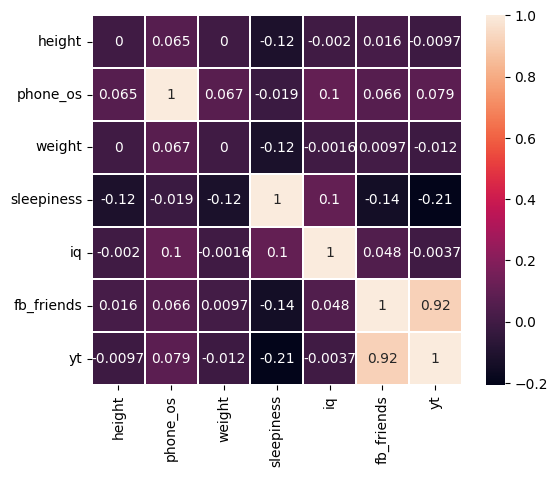

In [2724]:
import seaborn as sns
sns.heatmap(train_df[[ 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

<h2>2.4 檢查fb的資料分布

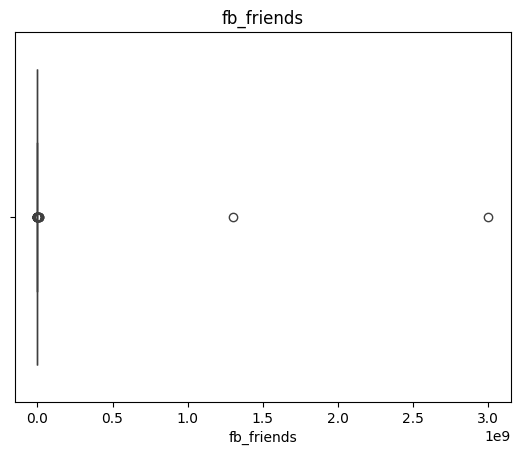

In [2725]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

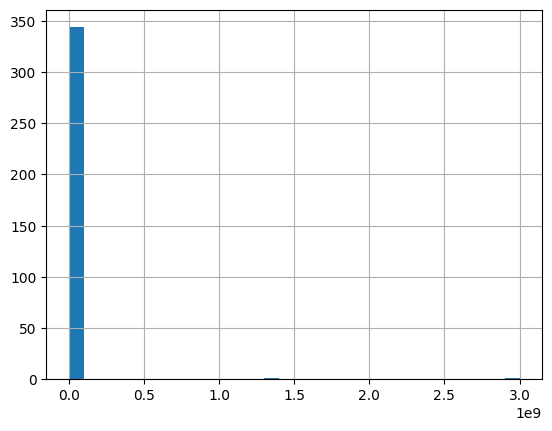

In [2726]:
train_df['fb_friends'].hist(bins=30)
plt.show()

In [2727]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] *= -1
test_df.loc[test_df['fb_friends'] < 0, 'fb_friends'] *= -1

In [2728]:
# 壓縮 > 5,000的資料
def process_fb_friends_mobile_traffic(df, upper_limit=3000):
    df = df.copy()
    df['is_outlier_fb_friends'] = df['fb_friends'] >= upper_limit
    df['fb_friends'] = df['fb_friends'].clip(upper=upper_limit)
    return df

train_df = process_fb_friends_mobile_traffic(train_df)
test_df = process_fb_friends_mobile_traffic(test_df)

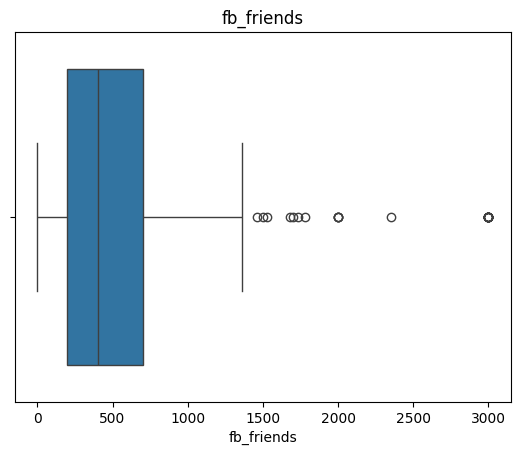

In [2729]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [2730]:
train_df.isnull().sum()

,0
phone_os,80
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0


<h2>2.5 檢查yt資料分布

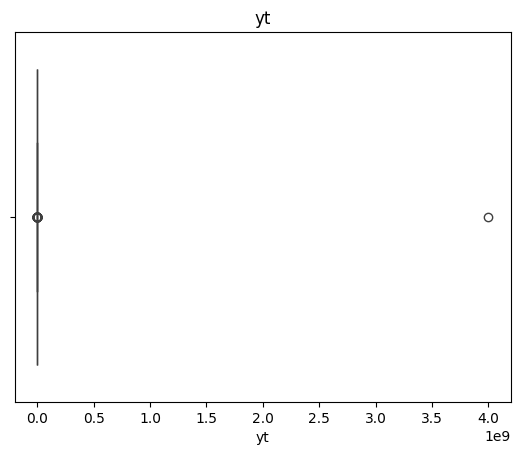

In [2731]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [2732]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] *= -1
test_df.loc[test_df['yt'] < 0, 'yt'] *= -1

In [2733]:
# 做clip 處理資料差距
def process_yt_mobile_traffic(df, upper_limit=500):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    return df

train_df = process_yt_mobile_traffic(train_df)
test_df = process_yt_mobile_traffic(test_df)

In [2734]:
train_df.isnull().sum()

,0
phone_os,80
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


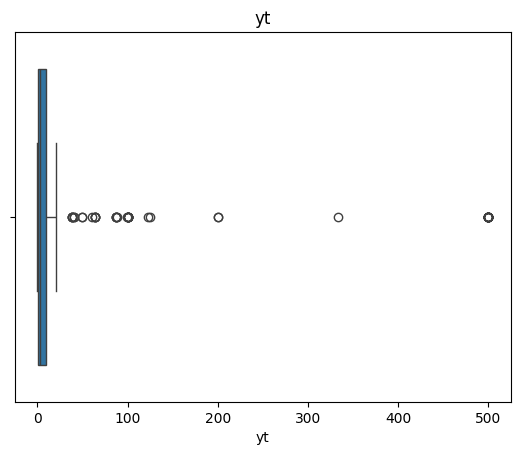

In [2735]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

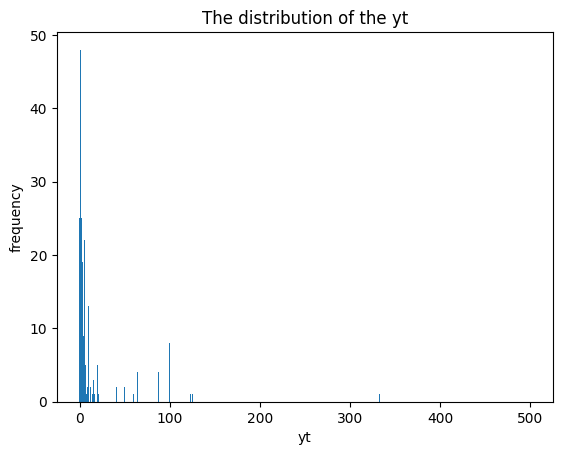

In [2736]:
sleepiness_values = train_df['yt'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['yt'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('yt')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the yt')
plt.show()

<h2>2.6檢查height分布




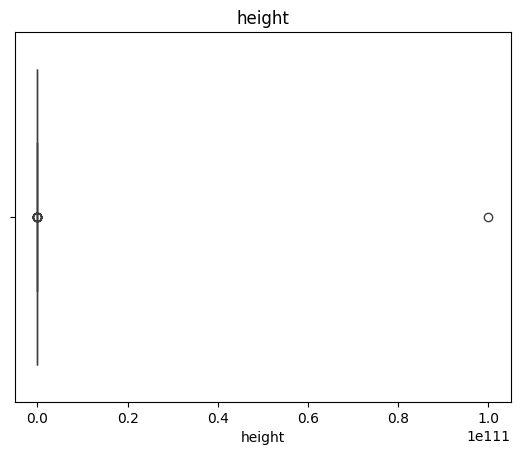

In [2737]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [2738]:
train_df.loc[train_df['height'] < 130, 'height'] = 140
test_df.loc[test_df['height'] < 130, 'height'] = 140

In [2739]:
def process_height_mobile_traffic(df, upper_limit=200):
    df = df.copy()
    df['is_outlier_height'] = df['height'] >= upper_limit
    df['height'] = df['height'].clip(upper=upper_limit)
    return df

train_df = process_height_mobile_traffic(train_df)
test_df = process_height_mobile_traffic(test_df)

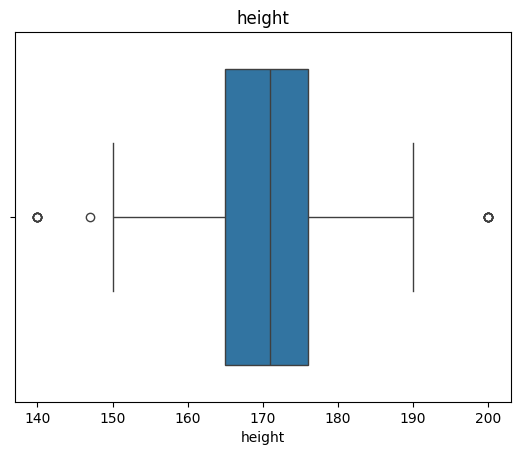

In [2740]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [2741]:
train_df.isnull().sum()

,0
phone_os,80
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0
is_outlier_height,0


<h2>2.7檢查weight分布

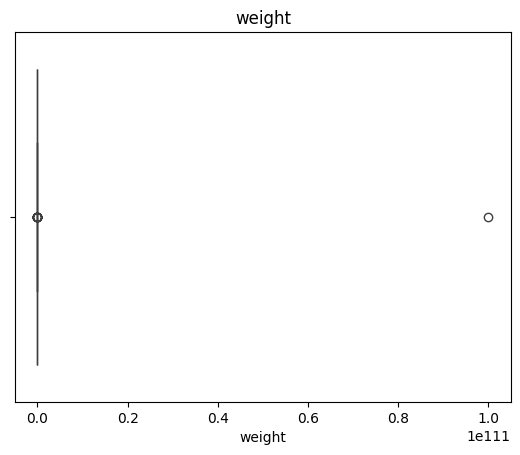

In [2742]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [2743]:
train_df.loc[(train_df['weight'] < 30), 'weight'] = 40
test_df.loc[(test_df['weight'] < 30), 'weight'] = 40

In [2744]:
def process_weight_mobile_traffic(df, upper_limit=130):
    df = df.copy()
    df['is_outlier_weight'] = df['weight'] >= upper_limit
    df['weight'] = df['weight'].clip(upper=upper_limit)
    return df

train_df = process_weight_mobile_traffic(train_df)
test_df = process_weight_mobile_traffic(test_df)

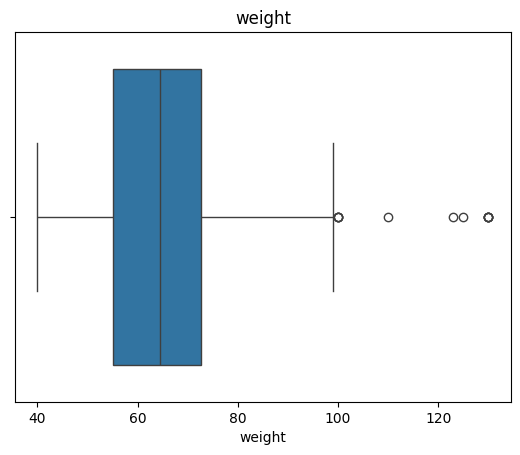

In [2745]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [2746]:
train_df.isnull().sum()

,0
phone_os,80
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0
is_outlier_height,0


<h2>2.8檢查IQ分布

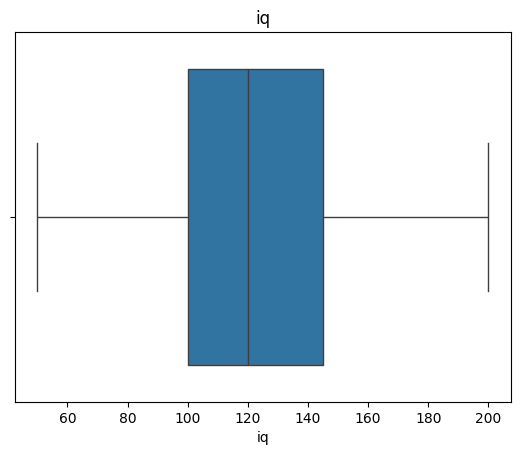

In [2747]:
sns.boxplot(x=train_df['iq'])
plt.title("iq")
plt.show()

<h2>2.9檢查sleepiness分布

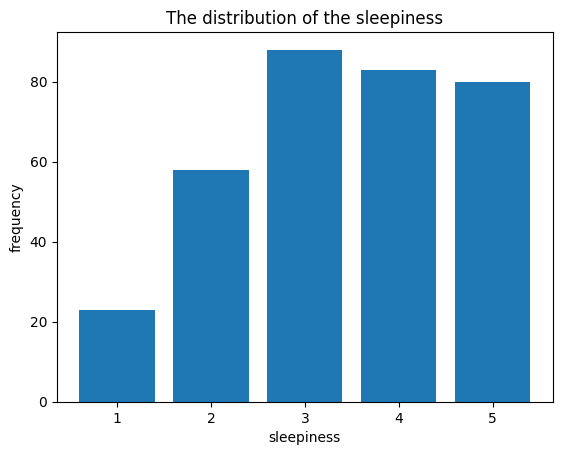

In [2748]:
sleepiness_values = train_df['sleepiness'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['sleepiness'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('sleepiness')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<h2>2.10 標記train離群值欄位

In [2749]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked

In [2750]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 88 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 97 筆離群值（不在 [28.38, 99.38] 內）
 iq: 已標記 79 筆離群值（不在 [32.5, 212.5] 內）
 fb_friends: 已標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
 yt: 已標記 146 筆離群值（不在 [-12.5, 23.5] 內）


<h2>2.11 標記test離群值

In [2751]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [2752]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 105 筆離群值（不在 [28.38, 99.38] 內）
【iq】在 test 中標記 92 筆離群值（不在 [32.5, 212.5] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
【yt】在 test 中標記 200 筆離群值（不在 [-12.5, 23.5] 內）


In [2753]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

In [2754]:
# 自動抓出含有 'is_outlier' 的欄位
outlier_cols = [col for col in train_df.columns if 'is_outlier' in col]

# 對這些欄位做 label encoding（其實 bool 直接轉 int 就行）
for col in outlier_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# **3. 缺失值處理**


In [2755]:
train_df.isnull().sum()

,0
phone_os,80
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0
is_outlier_height,0


<Axes: >

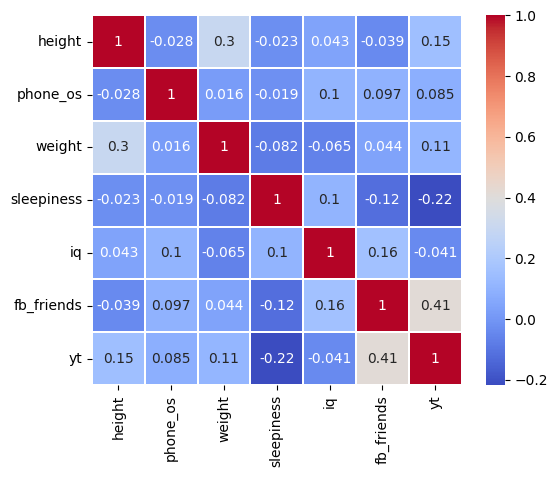

In [2756]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

# 3.1插補模型function

In [2757]:
def plot_imputation_distribution(df_before, df_after, target_col, title=None):
    plt.figure(figsize=(10,5))

    # After (補值後)
    sns.kdeplot(df_after[target_col], label='After imputation', fill=True)

    # Before (補值前，只用非缺失)
    sns.kdeplot(df_before[target_col].dropna(), label='Original (non-missing)', linestyle='--')

    if title is None:
        title = f"{target_col} Distribution Before vs After Imputation"

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [2758]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_topn_distribution_comparison(df_before, df_after, target, top_n=5):
    # Ensure numeric data
    df_before[target] = pd.to_numeric(df_before[target], errors='coerce').fillna(6)
    df_after[target] = pd.to_numeric(df_after[target], errors='coerce').fillna(6)

    # 補值前分佈
    pre_series = df_before[target].value_counts(normalize=True, dropna=False)
    pre_top = pre_series.iloc[:top_n]
    pre_others = pre_series.iloc[top_n:].sum()
    if isinstance(pre_others, (int, float, np.number)) and pre_others > 0:
        pre_top = pd.concat([pre_top, pd.Series([pre_others], index=['其他'])])

    # 補值後分佈
    post_series = df_after[target].value_counts(normalize=True, dropna=True)
    post_top = post_series.iloc[:top_n]
    post_others = post_series.iloc[top_n:].sum()
    if isinstance(post_others, (int, float, np.number)) and post_others > 0:
        post_top = pd.concat([post_top, pd.Series([post_others], index=['其他'])])

    # 合併成 dataframe
    compare_df = pd.DataFrame({
        '補值前': pre_top,
        '補值後': post_top
    }).fillna(0)

    # 畫圖
    compare_df.plot(kind='bar', figsize=(8, 5))
    plt.title(f'{target} 補值前後類別分佈 (Top {top_n})')
    plt.ylabel('比例')
    plt.xlabel('類別')
    plt.legend()
    plt.tight_layout()
    plt.show()

**DT+KNN**

In [2759]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

def dt_impute_classifier(train_df, test_df, target_col, predictor_cols, model_params=None):
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 補 predictors
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: train
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col].astype(int)

    if model_params is None:
        model_params = {'max_depth': 5, 'random_state': 42}
    model = DecisionTreeClassifier(**model_params)
    model.fit(X_train, y_train)

    # Step 3: impute train target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing).astype(int)

    # Step 4: impute test target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing).astype(int)

    # Step 5: 確保欄位型態 (重點)
    train_df[target_col] = train_df[target_col].astype(int)
    test_df[target_col] = test_df[target_col].astype(int)

    return train_df, test_df

**XG**

In [2760]:
from xgboost import XGBRegressor

def xgboost_impute(train_df, test_df, target_col, predictor_cols, model_params=None):
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: 訓練資料 (不需要補 predictors)
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'random_state': 42, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 補 train target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 補 test target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**RandomForest+KNN**

In [2761]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import numpy as np

def rf_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，不改原始的 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: predictor 缺失值用 KNN 補值 (只用在 copy)
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理（用補過的 copy）
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}
    model = RandomForestRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 只預測 target 缺失，不動其他 predictor
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: test_df 的 target 缺失值預測
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**SVM+KNN**

In [2762]:
from sklearn.svm import SVR
from sklearn.impute import KNNImputer

def svm_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立副本，避免直接改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 只補在 copy 中
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'C': 1.0, 'epsilon': 0.1}
    model = SVR(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**KNN+KNN**

In [2763]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

def knn_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，避免改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNNImputer 暫時補 predictor 缺失
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 用補好的 copy 去訓練
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_neighbors': 5}
    model = KNeighborsRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**MICE**

In [2764]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def impute_mice_train(train_df, target_col, predictor_cols, mice_params=None):
    train_df = train_df.copy()

    if mice_params is None:
        mice_params = {
            'estimator': DecisionTreeRegressor(max_depth=5, random_state=42),
            'max_iter': 10,
            'random_state': 42
        }

    # Step 1: MICE fit + transform on train
    imputer_mice = IterativeImputer(**mice_params)
    cols_for_mice = predictor_cols + [target_col]
    train_df[cols_for_mice] = imputer_mice.fit_transform(train_df[cols_for_mice])

    return train_df, imputer_mice


def impute_mice_test(test_df, target_col, predictor_cols, imputer_mice):
    test_df = test_df.copy()

    # Step 2: 對 test 單獨做 mice transform
    cols_for_mice = predictor_cols + [target_col]
    test_for_mice = test_df[cols_for_mice].copy()

    # Step 3: transform (不更新 imputer)
    test_for_mice_imputed = imputer_mice.transform(test_for_mice)

    # Step 4: 回填 target
    test_df[target_col] = test_for_mice_imputed[:, -1]  # target 是最後一個 column

    return test_df


**MissForest**

In [2765]:
pip install MissForest

In [2766]:
from missforest import MissForest
from sklearn.impute import KNNImputer

def knn_missforest_impute(train_df, test_df, target_col, predictor_cols, knn_params=None, mf_params=None):

    train_df = train_df.copy()
    test_df = test_df.copy()

    # # Step 1: KNNImputer 補 predictors
    # if knn_params is None:
    #     knn_params = {'n_neighbors': 5}
    # imputer_knn = KNNImputer(**knn_params)
    # train_df[predictor_cols] = imputer_knn.fit_transform(train_df[predictor_cols])
    # test_df[predictor_cols] = imputer_knn.transform(test_df[predictor_cols])

    # Step 2: MissForest 補 target（train + test 一起補）
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 自動判斷 categorical features
    categorical = [col for col in combined_df.columns if combined_df[col].dtype in ['object', 'category']]

    if mf_params is None:
        mf_params = {'max_iter': 10, 'categorical': categorical}

    mf = MissForest(**mf_params)

    if combined_df.isnull().sum().sum() > 0:
        combined_imputed = mf.fit_transform(combined_df)
        combined_df = pd.DataFrame(combined_imputed, columns=combined_df.columns)

    # Step 3: 切回 train, test
    train_df = combined_df.iloc[:len(train_df)].reset_index(drop=True)
    test_df = combined_df.iloc[len(train_df):].reset_index(drop=True)

    return train_df, test_df

# 3.2 定義欄位

In [2767]:
num_predictor_dict = {
    'fb_friends': ['iq', 'yt', 'phone_os','sleepiness'],
    'iq': ['phone_os', 'sleepiness', 'fb_friends'],
    'yt': ['fb_friends', 'sleepiness', 'height', 'weight'],
    'weight': ['height', 'yt',],
    'height': ['yt', 'weight']
}
cat_predictor_dict = {
    'phone_os': ['iq', 'fb_friends'],
    'sleepiness': ['yt', 'iq', 'fb_friends']
}

# **3.3 分區填補缺失值**

資料分布

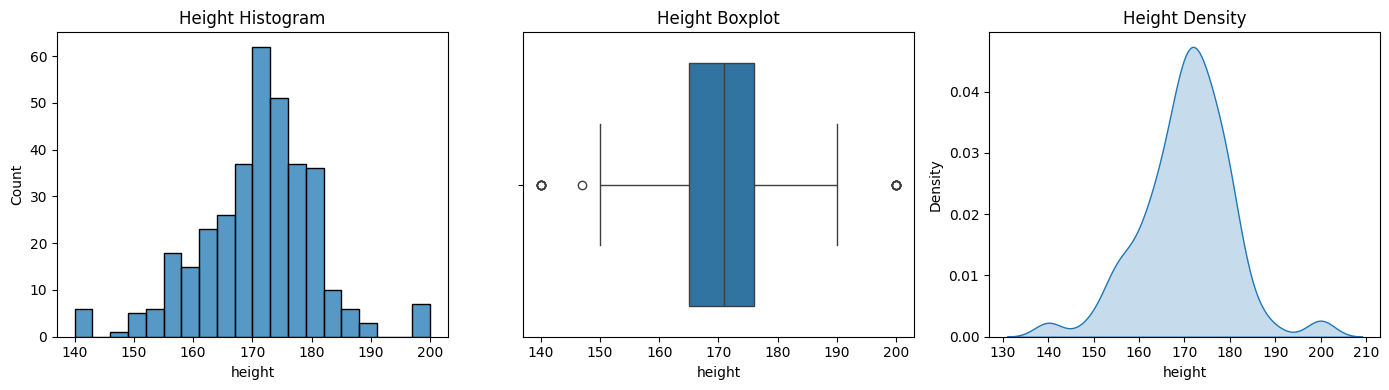

In [1814]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['height'], bins=20, kde=False)
plt.title('Height Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['height'])
plt.title('Height Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['height'], fill=True)
plt.title('Height Density')

plt.tight_layout()
plt.show()


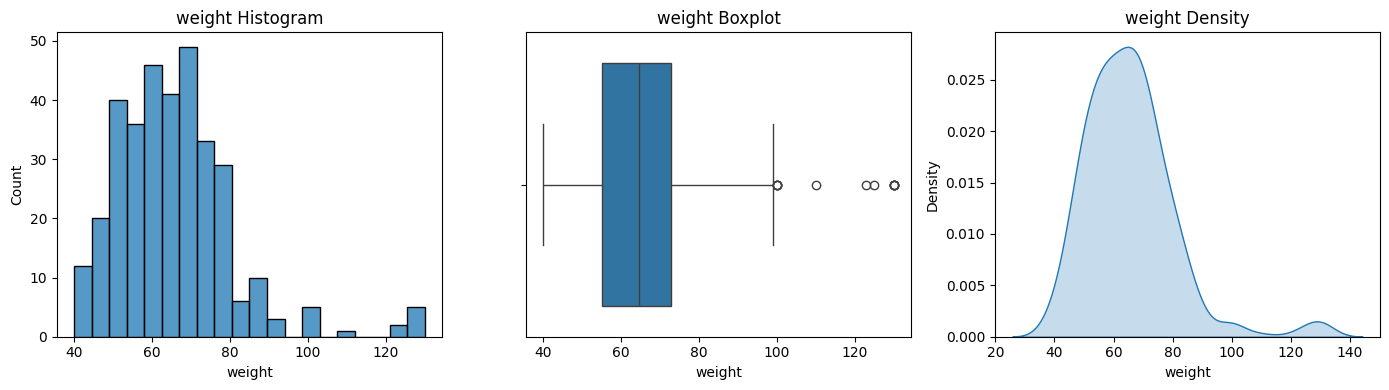

In [1815]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['weight'], bins=20, kde=False)
plt.title('weight Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['weight'])
plt.title('weight Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['weight'], fill=True)
plt.title('weight Density')

plt.tight_layout()
plt.show()


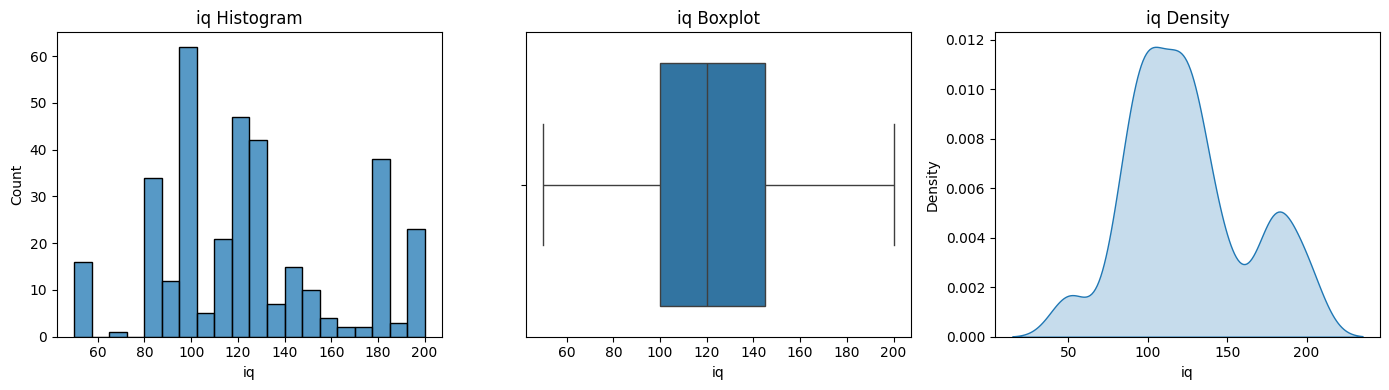

In [1816]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['iq'], bins=20, kde=False)
plt.title('iq Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['iq'])
plt.title('iq Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['iq'], fill=True)
plt.title('iq Density')

plt.tight_layout()
plt.show()


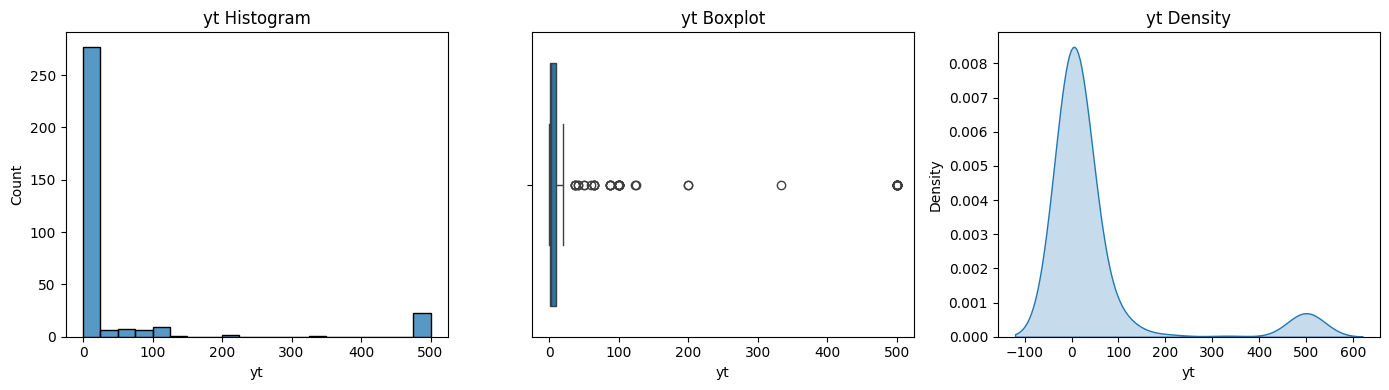

In [1817]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['yt'], bins=20, kde=False)
plt.title('yt Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['yt'])
plt.title('yt Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['yt'], fill=True)
plt.title('yt Density')

plt.tight_layout()
plt.show()


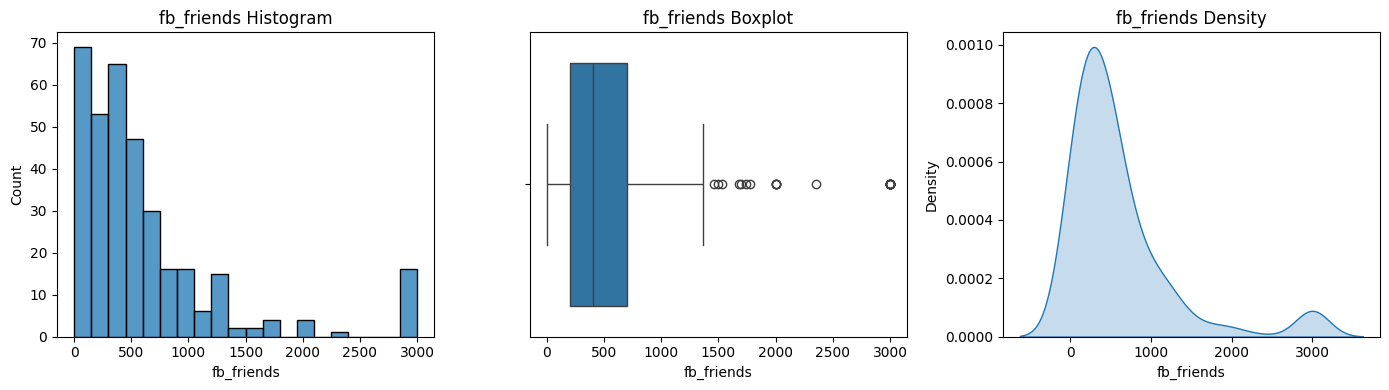

In [1818]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['fb_friends'], bins=20, kde=False)
plt.title('fb_friends Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['fb_friends'])
plt.title('fb_friends Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['fb_friends'], fill=True)
plt.title('fb_friends Density')

plt.tight_layout()
plt.show()

height分割區域

In [1819]:
# 查詢 height 和 weight 同時缺失的筆數
missing_count = train_df[train_df['height'].isnull() & train_df['weight'].isnull()].shape[0]

print(f"身高和體重同時缺失的有 {missing_count} 筆")

身高和體重同時缺失的有 15 筆


In [1820]:
# 查詢 height 和 weight 同時缺失的筆數
missing_count = test_df[test_df['height'].isnull() & test_df['weight'].isnull()].shape[0]

print(f"身高和體重同時缺失的有 {missing_count} 筆")

身高和體重同時缺失的有 14 筆


height

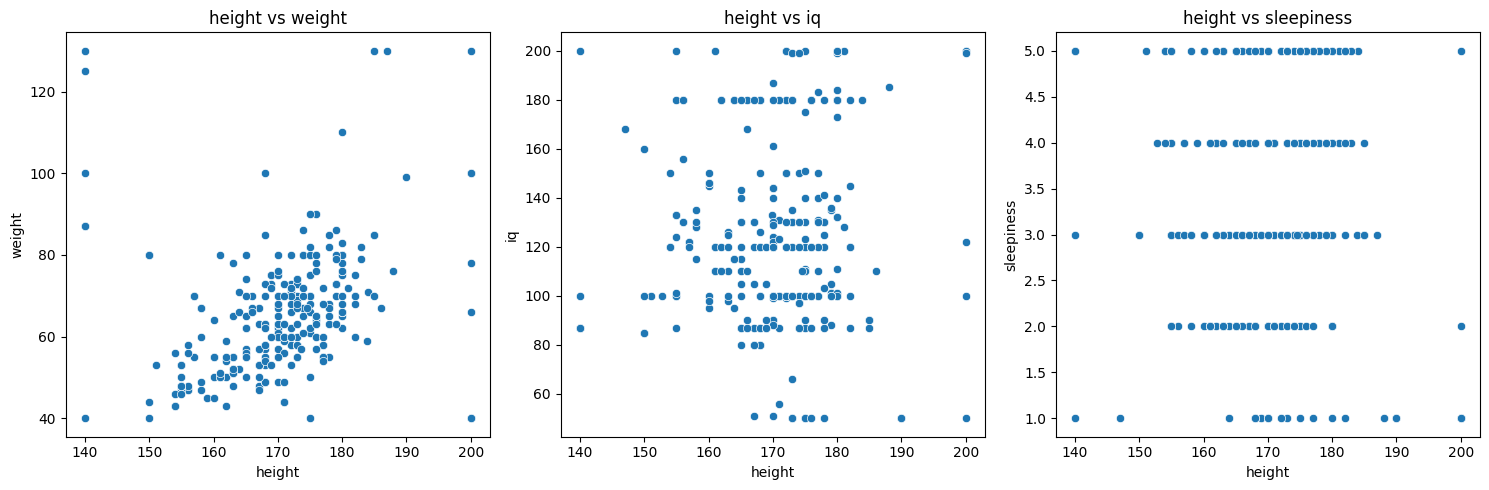

In [1821]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='height', y='weight', data=train_df, ax=axes[0])
axes[0].set_title('height vs weight')

# 第二張圖
sns.scatterplot(x='height', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('height vs iq')

# 第三張圖
sns.scatterplot(x='height', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('height vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

Text(0.5, 1.0, 'height vs fb_friends')

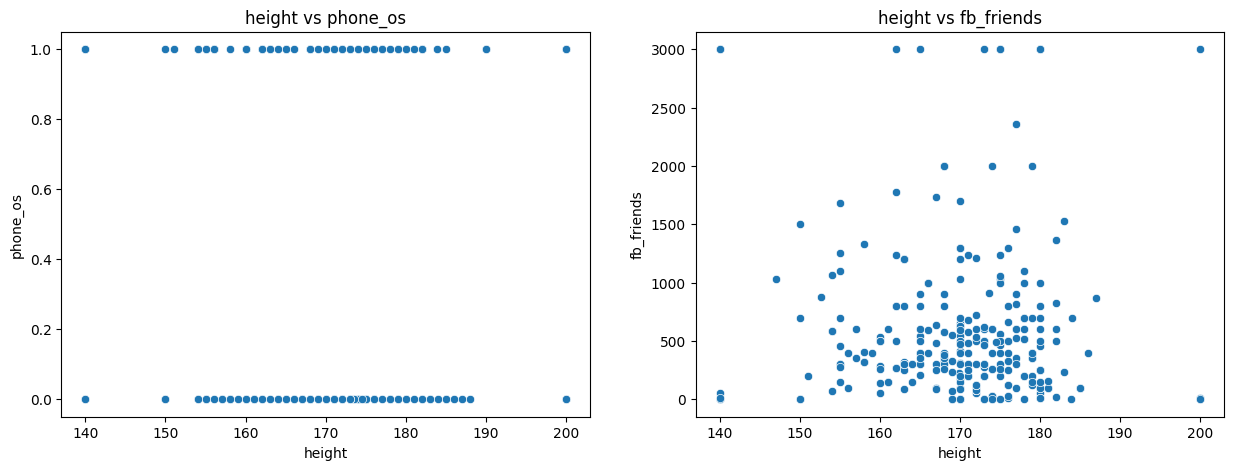

In [1822]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='height', y='phone_os', data=train_df, ax=axes[0])
axes[0].set_title('height vs phone_os')

# 第二張圖
sns.scatterplot(x='height', y='fb_friends', data=train_df, ax=axes[1])
axes[1].set_title('height vs fb_friends')


**補weight**

In [1823]:
# height <= 140
median_low = train_df.loc[train_df['height'] <= 140, 'weight'].median()
train_df.loc[(train_df['height'] <= 140) & (train_df['weight'].isnull()), 'weight'] = median_low
test_df.loc[(test_df['height'] <= 140) & (test_df['weight'].isnull()), 'weight'] = median_low

# 140 < height <= 160
median_140_160 = train_df.loc[(train_df['height'] > 140) & (train_df['height'] <= 160), 'weight'].median()
train_df.loc[(train_df['height'] > 140) & (train_df['height'] <= 160) & (train_df['weight'].isnull()), 'weight'] = median_140_160
test_df.loc[(test_df['height'] > 140) & (test_df['height'] <= 160) & (test_df['weight'].isnull()), 'weight'] = median_140_160

# 160 < height < 170
median_male = train_df.loc[(train_df['height'] > 160) & (train_df['height'] < 170) , 'weight'].median()
train_df.loc[(train_df['height'] > 160) & (train_df['height'] < 170) & (train_df['weight'].isnull()), 'weight'] = median_male
test_df.loc[(test_df['height'] > 160) & (test_df['height'] < 170) & (test_df['weight'].isnull()), 'weight'] = median_male

# 170 <= height < 180
median_170_180 = train_df.loc[(train_df['height'] >= 170) & (train_df['height'] < 180), 'weight'].median()
train_df.loc[(train_df['height'] >= 170) & (train_df['height'] < 180) & (train_df['weight'].isnull()), 'weight'] = median_170_180
test_df.loc[(test_df['height'] >= 170) & (test_df['height'] < 180) & (test_df['weight'].isnull()), 'weight'] = median_170_180

# height >= 180
median_high = train_df.loc[train_df['height'] >= 180, 'weight'].median()
train_df.loc[(train_df['height'] >= 180) & (train_df['weight'].isnull()), 'weight'] = median_high
test_df.loc[(test_df['height'] >= 180) & (test_df['weight'].isnull()), 'weight'] = median_high


**補fb_friends**

In [1824]:
# Step 1. 先計算該區間的中位數
median_140_160 = train_df.loc[(train_df['height'] >= 170) & (180 >= train_df['height']), 'fb_friends'].median()

# Step 2. 只補 fb_friends 缺失 且 height 在 140 ~ 160 的資料
train_df.loc[(train_df['height'] >= 170) & (180 >= train_df['height']) & (train_df['fb_friends'].isnull()), 'fb_friends'] = median_140_160
test_df.loc[(train_df['height'] >= 170) & (180 >= train_df['height']) & (test_df['fb_friends'].isnull()), 'fb_friends'] = median_140_160

weight分割

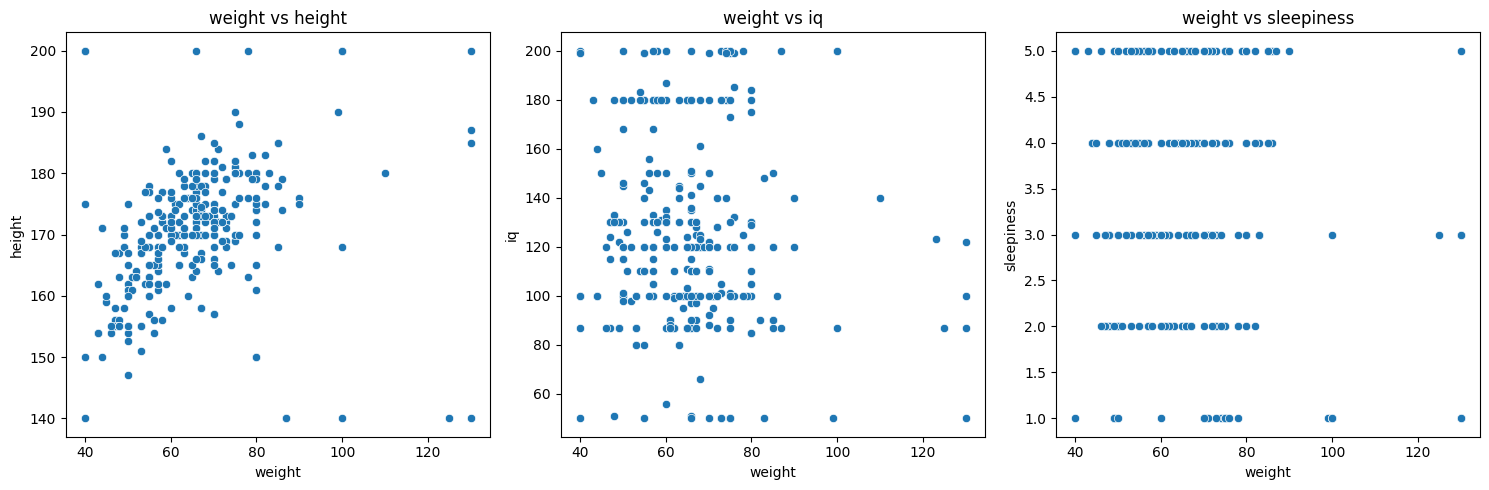

In [1825]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='weight', y='height', data=train_df, ax=axes[0])
axes[0].set_title('weight vs height')

# 第二張圖
sns.scatterplot(x='weight', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('weight vs iq')

# 第三張圖
sns.scatterplot(x='weight', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('weight vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

Text(0.5, 1.0, 'weight vs fb_friends')

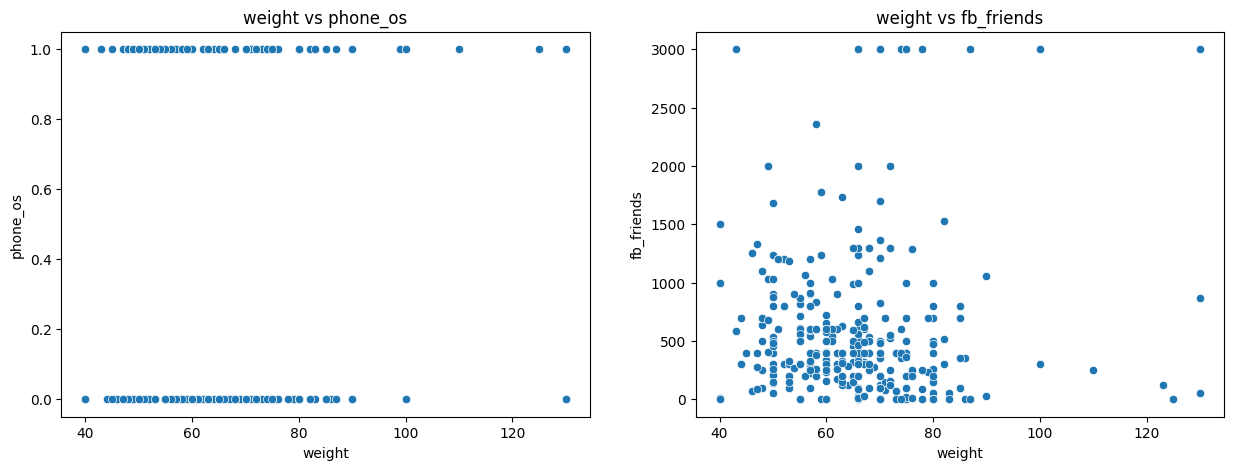

In [1826]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='weight', y='phone_os', data=train_df, ax=axes[0])
axes[0].set_title('weight vs phone_os')

# 第二張圖
sns.scatterplot(x='weight', y='fb_friends', data=train_df, ax=axes[1])
axes[1].set_title('weight vs fb_friends')


**補height**

In [1827]:
# 計算 40 >= weight 的 height 中位數
median_low = train_df.loc[40 >= train_df['weight'], 'height'].median()

# 只補 weight =< 40 & height 缺失 的資料
train_df.loc[(40 >= train_df['weight']) & (train_df['height'].isnull()), 'height'] = median_low
test_df.loc[(40 >= train_df['weight']) & (test_df['height'].isnull()), 'height'] = median_low

# 計算 weight>80 的 height 中位數
median_low = train_df.loc[train_df['weight'] > 80, 'height'].median()

# 只補 weight >80 & height 缺失 的資料
train_df.loc[(train_df['weight'] > 80) & (train_df['height'].isnull()), 'height'] = median_low
test_df.loc[(train_df['weight'] > 80) & (test_df['height'].isnull()), 'height'] = median_low

In [1828]:
median_male = train_df.loc[(80 >= train_df['weight']) & (train_df['weight'] >= 60), 'height'].median()

train_df.loc[(80 >= train_df['weight']) & (train_df['weight'] >= 60) & (train_df['height'].isnull()), 'height'] = median_male
test_df.loc[(80 >= test_df['weight']) & (test_df['weight'] >= 60) & (test_df['height'].isnull()), 'height'] = median_male

In [1829]:
median_male = train_df.loc[(60 > train_df['weight']) & (train_df['weight'] > 40), 'height'].median()

train_df.loc[(60 > train_df['weight']) & (train_df['weight'] > 40) & (train_df['height'].isnull()), 'height'] = median_male
test_df.loc[(60 > test_df['weight']) & (test_df['weight'] > 40) & (test_df['height'].isnull()), 'height'] = median_male

**補fb_friends**

In [1830]:
# Step 1. 先計算該區間的中位數
median_60_70 = train_df.loc[(train_df['weight'] >= 60) & (70 > train_df['weight']), 'fb_friends'].median()

train_df.loc[(train_df['weight'] >= 60) & (70 > train_df['weight']) & (train_df['fb_friends'].isnull()), 'fb_friends'] = median_60_70
test_df.loc[(train_df['weight'] >= 60) & (70 > train_df['weight']) & (test_df['fb_friends'].isnull()), 'fb_friends'] = median_60_70

# Step 1. 先計算該區間的中位數
median_70_80 = train_df.loc[(train_df['weight'] >= 60) & (70 >= train_df['weight']), 'fb_friends'].median()

train_df.loc[(train_df['weight'] >= 70) & (80 >= train_df['weight']) & (train_df['fb_friends'].isnull()), 'fb_friends'] = median_70_80
test_df.loc[(train_df['weight'] >= 70) & (80 >= train_df['weight']) & (test_df['fb_friends'].isnull()), 'fb_friends'] = median_70_80

fb_friends

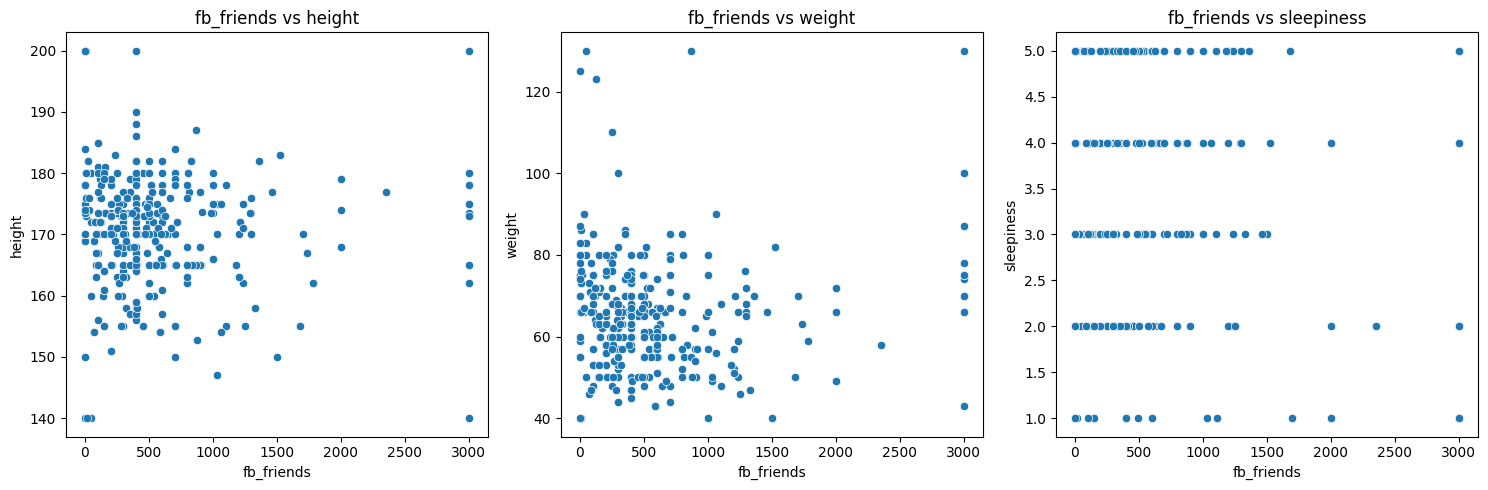

In [1831]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='fb_friends', y='height', data=train_df, ax=axes[0])
axes[0].set_title('fb_friends vs height')

# 第二張圖
sns.scatterplot(x='fb_friends', y='weight', data=train_df, ax=axes[1])
axes[1].set_title('fb_friends vs weight')

# 第三張圖
sns.scatterplot(x='fb_friends', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('fb_friends vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

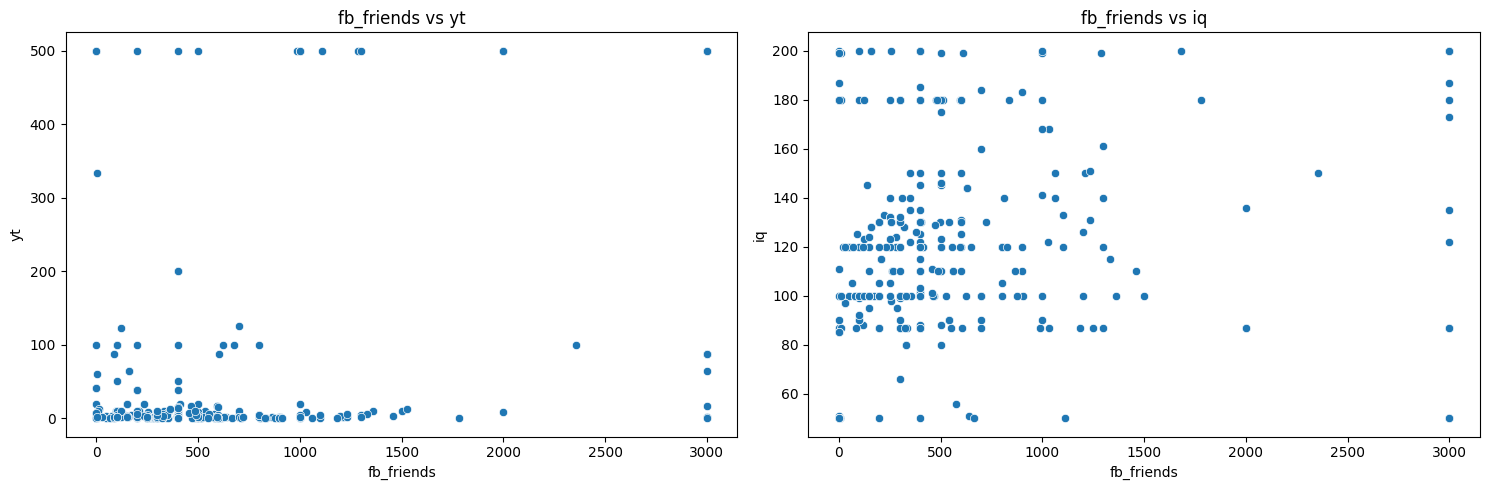

In [1832]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 2 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='fb_friends', y='yt', data=train_df, ax=axes[0])
axes[0].set_title('fb_friends vs yt')

# 第二張圖
sns.scatterplot(x='fb_friends', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('fb_friends vs iq')

plt.tight_layout()  # 自動調整間距
plt.show()

In [1833]:
median_fb = train_df['fb_friends'].median()
train_df.loc[train_df['fb_friends'].isnull(), 'fb_friends'] = median_fb
test_df.loc[test_df['fb_friends'].isnull(), 'fb_friends'] = median_fb

yt

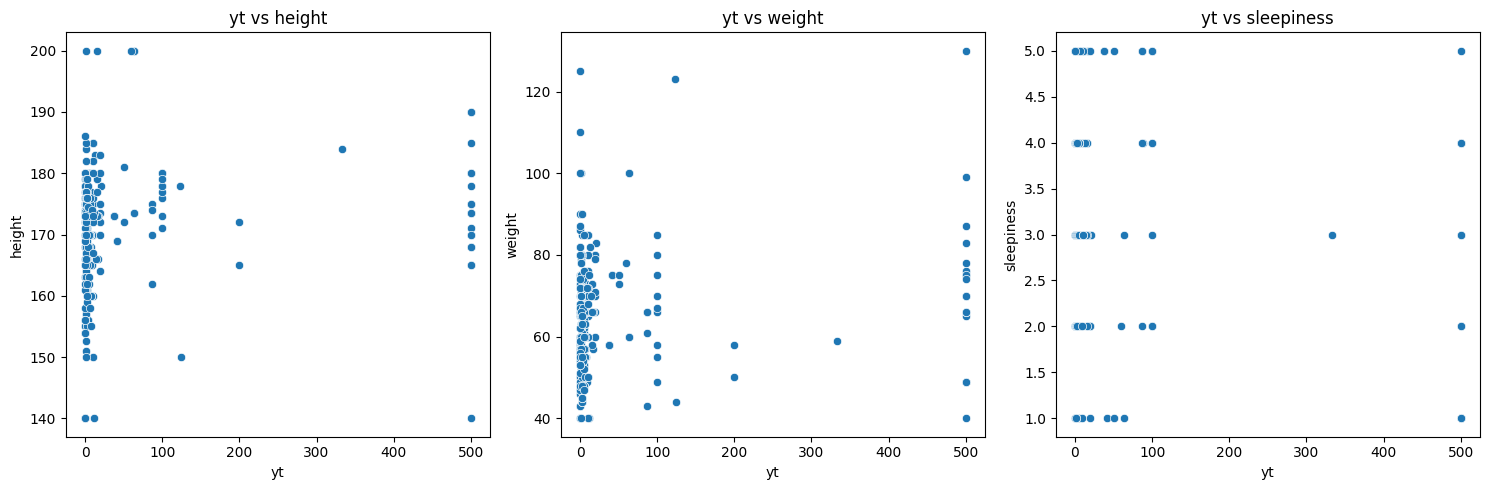

In [1834]:
# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='yt', y='height', data=train_df, ax=axes[0])
axes[0].set_title('yt vs height')

# 第二張圖
sns.scatterplot(x='yt', y='weight', data=train_df, ax=axes[1])
axes[1].set_title('yt vs weight')

# 第三張圖
sns.scatterplot(x='yt', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('yt vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()

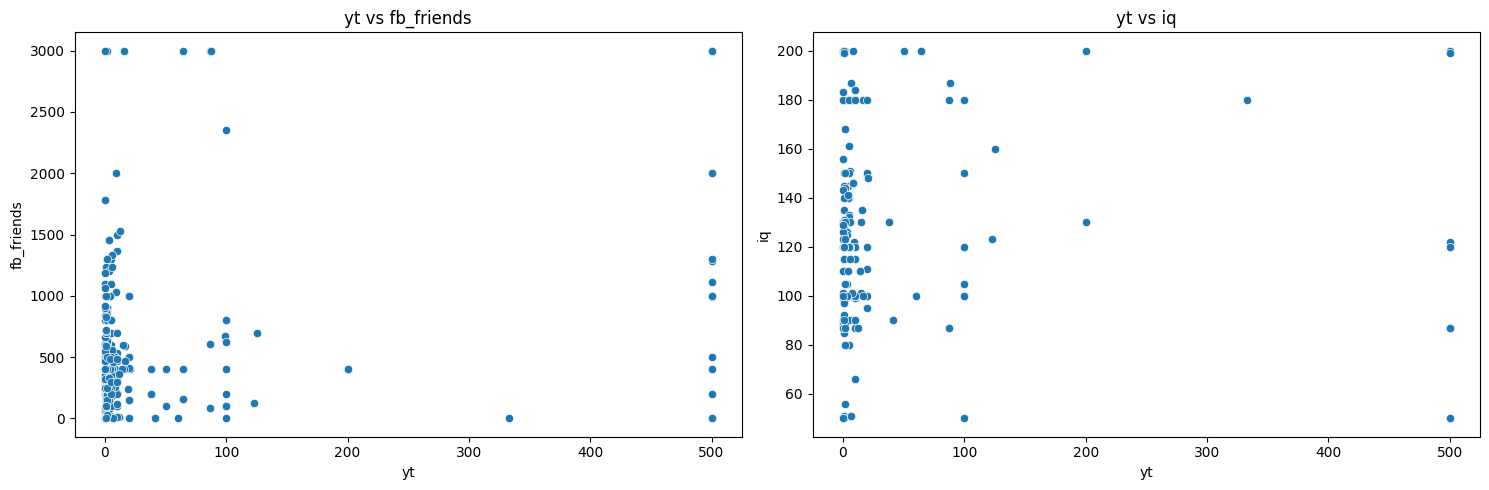

In [1835]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 2 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='yt', y='fb_friends', data=train_df, ax=axes[0])
axes[0].set_title('yt vs fb_friends')

# 第二張圖
sns.scatterplot(x='yt', y='iq', data=train_df, ax=axes[1])
axes[1].set_title('yt vs iq')

plt.tight_layout()  # 自動調整間距
plt.show()

In [1836]:
# 簡單 median 補值
median_yt = train_df['yt'].median()
train_df.loc[train_df['yt'].isnull(), 'yt'] = median_yt
test_df.loc[test_df['yt'].isnull(), 'yt'] = median_yt

iq

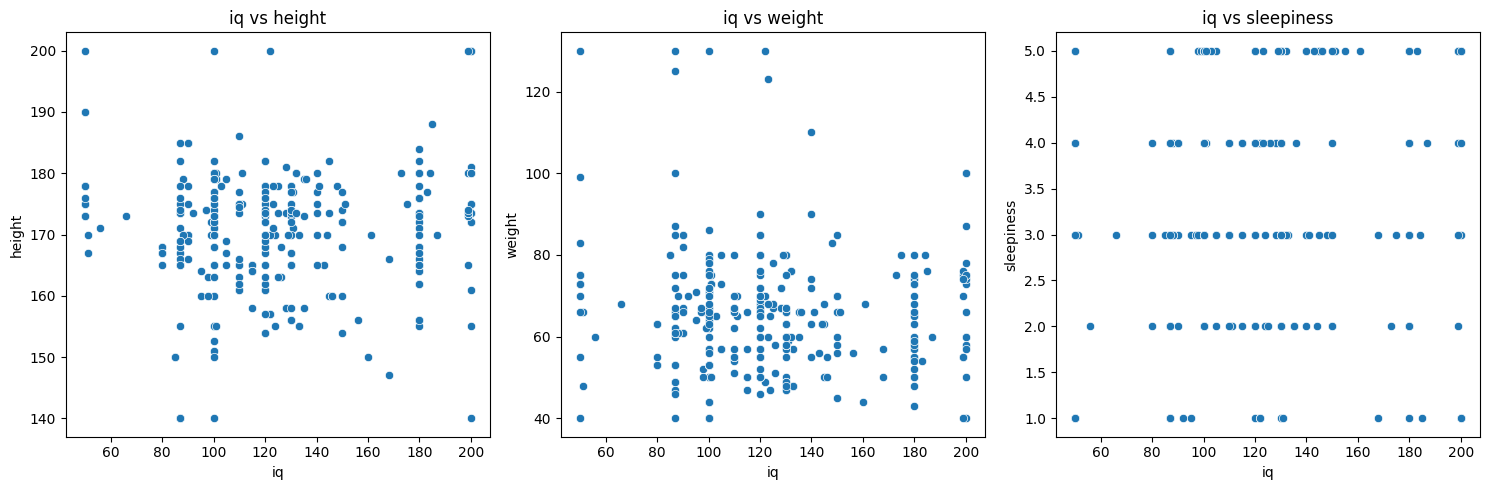

In [1837]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 3 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='iq', y='height', data=train_df, ax=axes[0])
axes[0].set_title('iq vs height')

# 第二張圖
sns.scatterplot(x='iq', y='weight', data=train_df, ax=axes[1])
axes[1].set_title('iq vs weight')

# 第三張圖
sns.scatterplot(x='iq', y='sleepiness', data=train_df, ax=axes[2])
axes[2].set_title('iq vs sleepiness')

plt.tight_layout()  # 自動調整間距
plt.show()


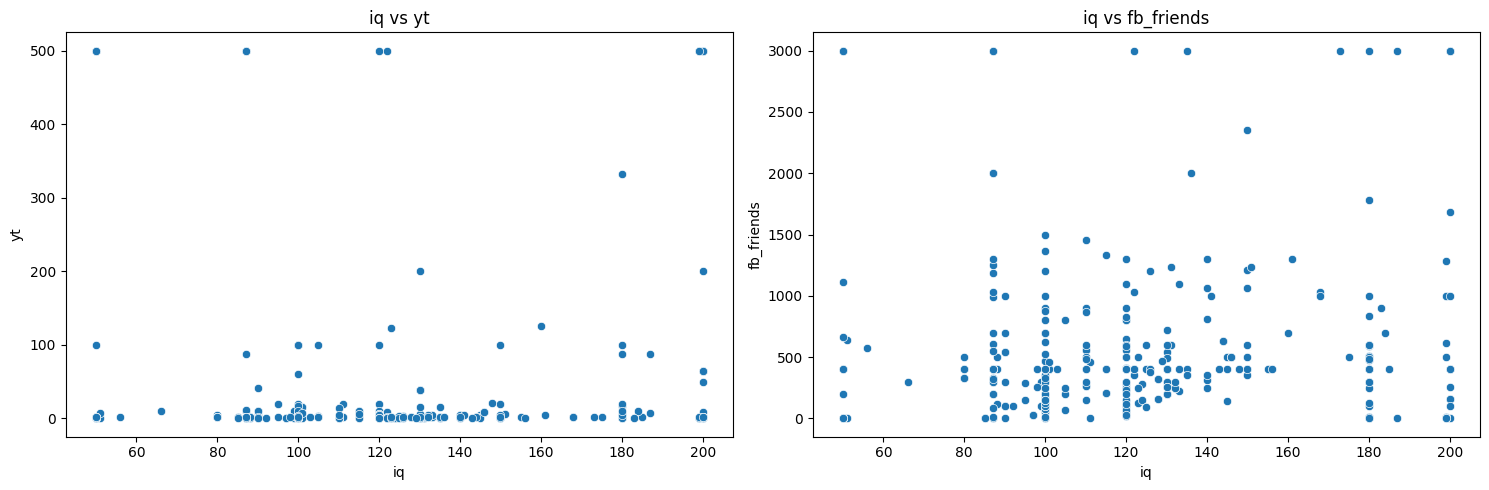

In [1838]:
import matplotlib.pyplot as plt
import seaborn as sns

# 建立 1 行 2 列的 subplot，並設定圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # (寬, 高)

# 第一張圖
sns.scatterplot(x='iq', y='yt', data=train_df, ax=axes[0])
axes[0].set_title('iq vs yt')

# 第二張圖
sns.scatterplot(x='iq', y='fb_friends', data=train_df, ax=axes[1])
axes[1].set_title('iq vs fb_friends')

plt.tight_layout()  # 自動調整間距
plt.show()

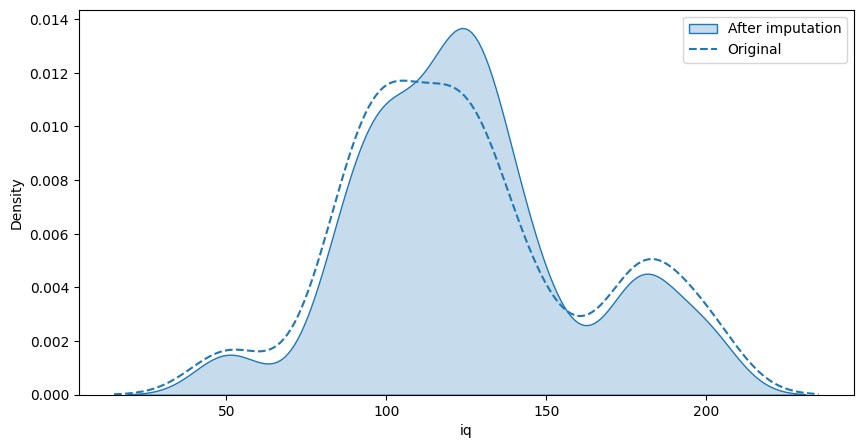

In [1839]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- 基本設定 ----------
predictor_cols = ['height', 'weight', 'fb_friends', 'yt', 'sleepiness']
target_col = 'iq'

# ---------- Step 1. 複製資料 ----------
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

# ---------- Step 2. 補 predictor 缺失 (KNNImputer + StandardScaler) ----------
scaler = StandardScaler()
train_df_copy[predictor_cols] = scaler.fit_transform(train_df_copy[predictor_cols])
test_df_copy[predictor_cols] = scaler.transform(test_df_copy[predictor_cols])

imputer = KNNImputer(n_neighbors=5)
train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

# ---------- Step 3. KNN Regression 補 IQ ----------
model = KNeighborsRegressor(n_neighbors=5)
model.fit(train_df_copy[train_df[target_col].notnull()][predictor_cols],
          train_df[train_df[target_col].notnull()][target_col])

train_df.loc[train_df[target_col].isnull(), target_col] = model.predict(train_df_copy.loc[train_df[target_col].isnull(), predictor_cols])
test_df.loc[test_df[target_col].isnull(), target_col] = model.predict(test_df_copy.loc[test_df[target_col].isnull(), predictor_cols])

# ---------- Step 4. 補值診斷 ----------

# 分佈圖
plt.figure(figsize=(10,5))
sns.kdeplot(train_df[target_col], label='After imputation', fill=True)
sns.kdeplot(train_df_before[train_df_before[target_col].notnull()][target_col], label='Original', linestyle='--')
plt.legend()
plt.show()

# 3.3 DT填補類別欄位

In [2768]:
for target, predictors in cat_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = dt_impute_classifier(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())


正在處理: phone_os
phone_os 缺失值統計 (train):
phone_os    0
dtype: int64
phone_os 缺失值統計 (test):
phone_os    0
dtype: int64
正在處理: sleepiness
sleepiness 缺失值統計 (train):
sleepiness    0
dtype: int64
sleepiness 缺失值統計 (test):
sleepiness    0
dtype: int64


# 3.4 XG分欄特徵選擇(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

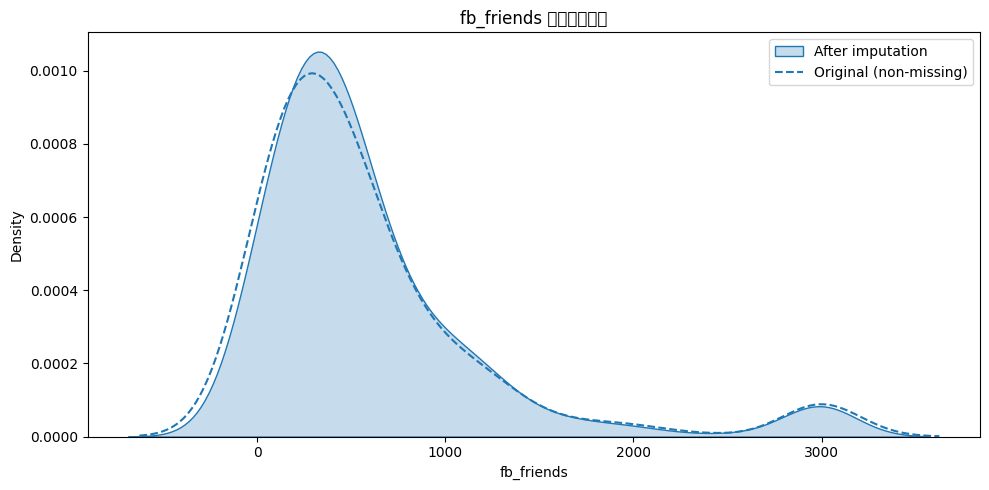

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

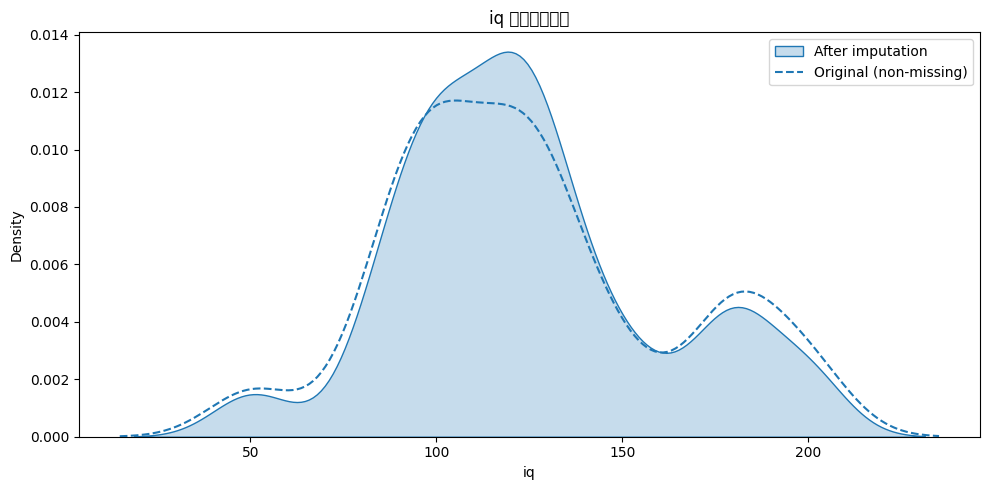

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

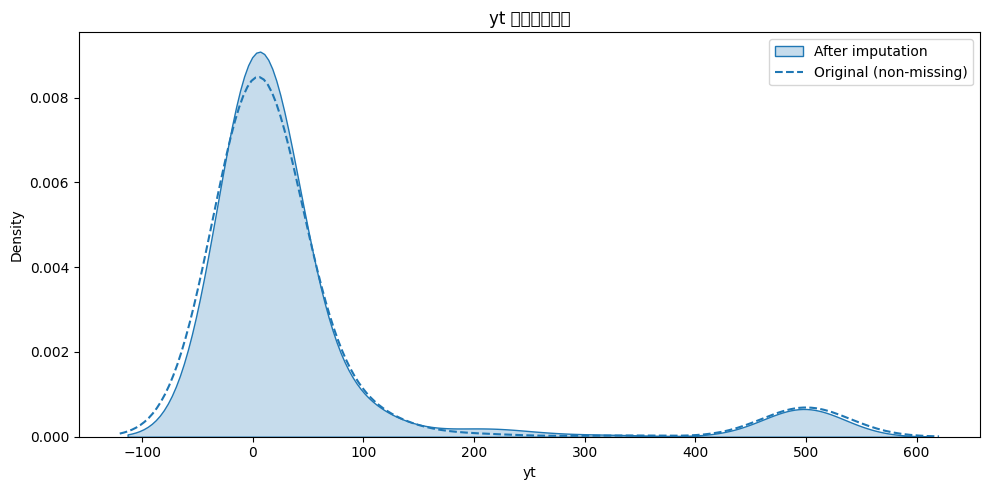

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

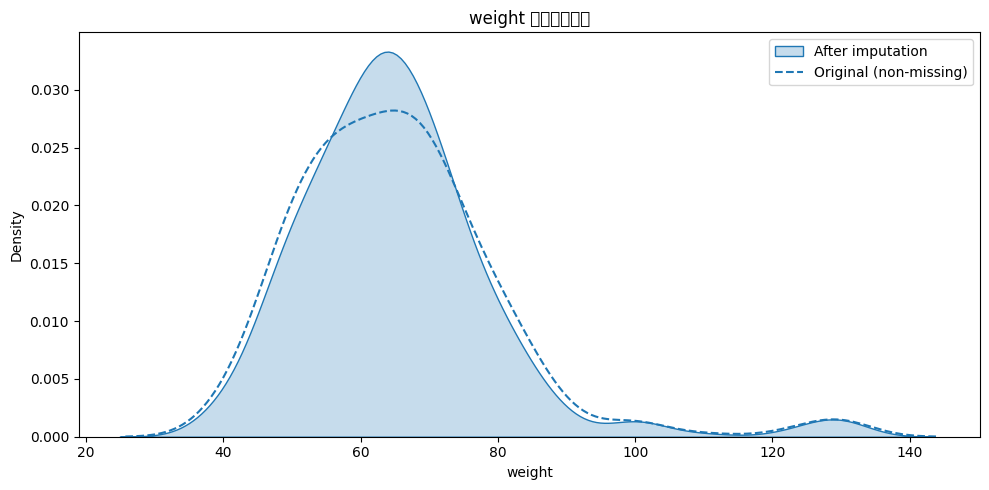

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1497-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

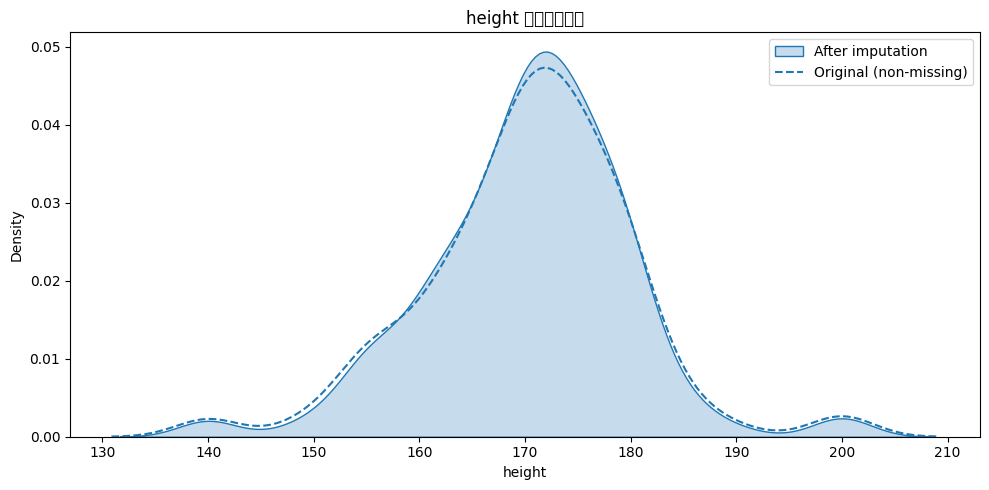

In [1510]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = xgboost_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 RF數值欄位填補(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

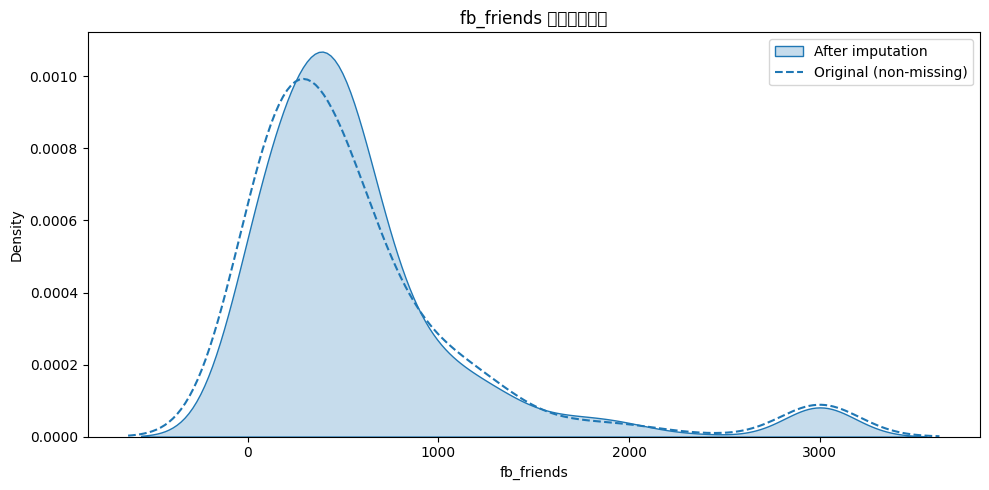

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

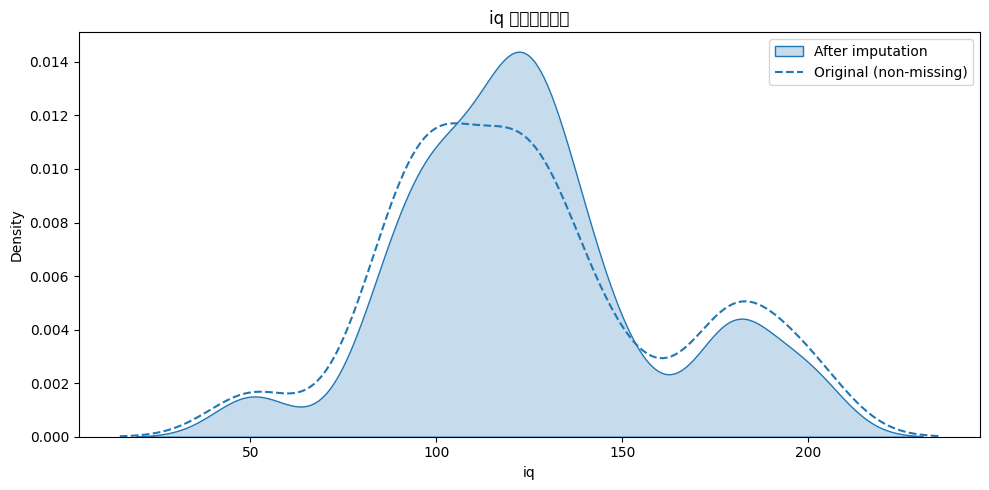

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

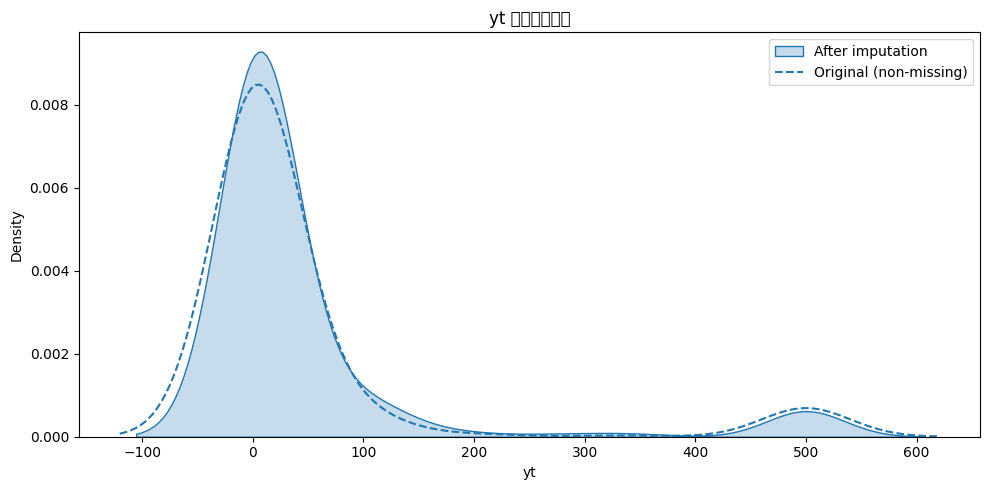

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

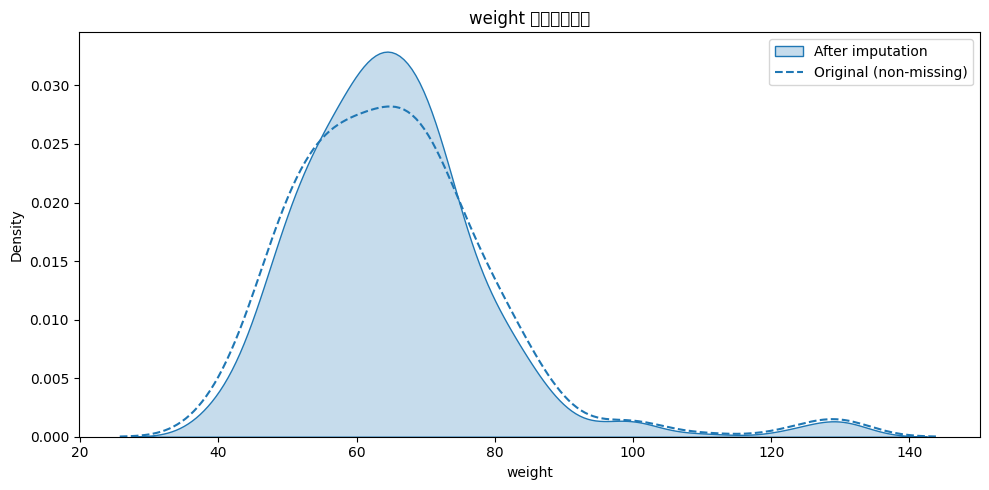

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1559-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

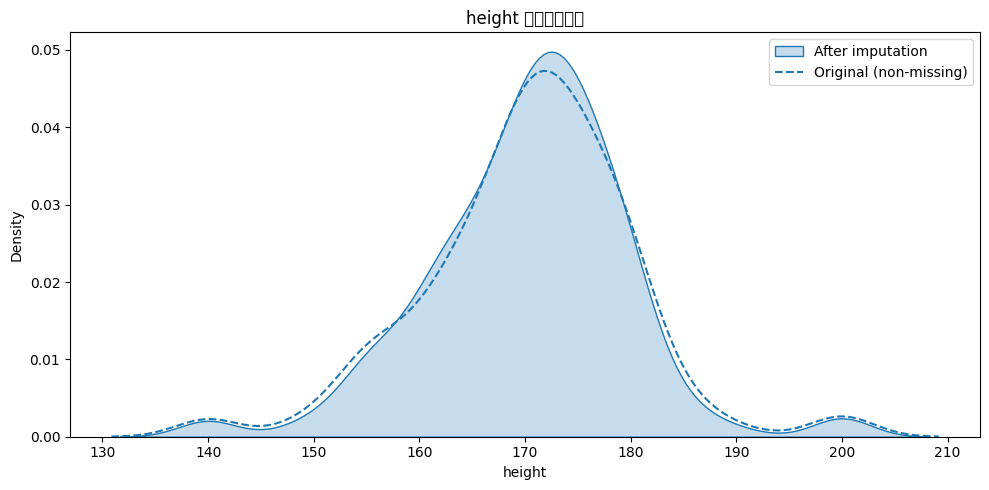

In [1570]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = rf_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 SVM(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

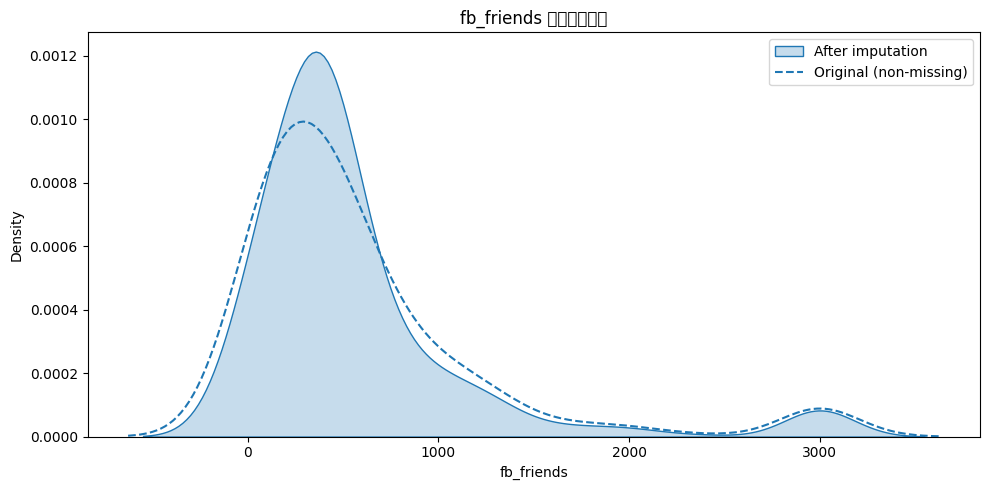

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

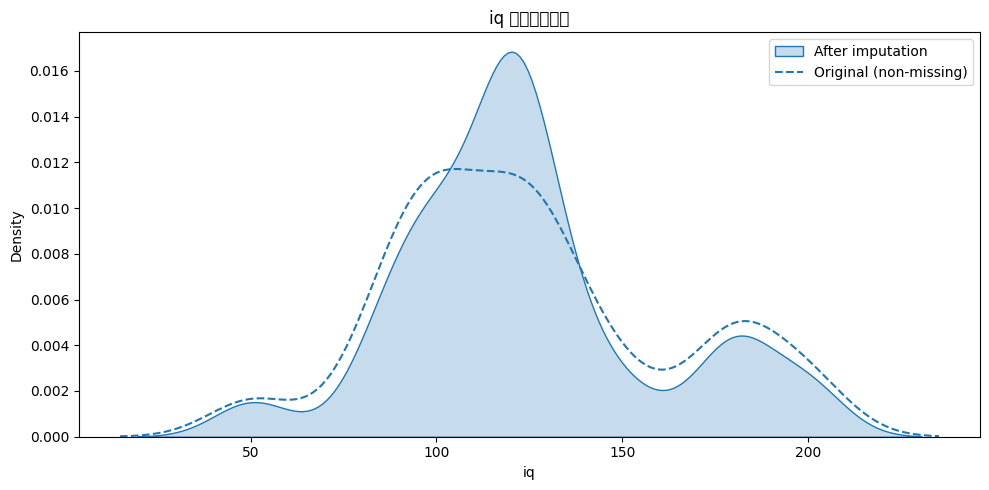

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

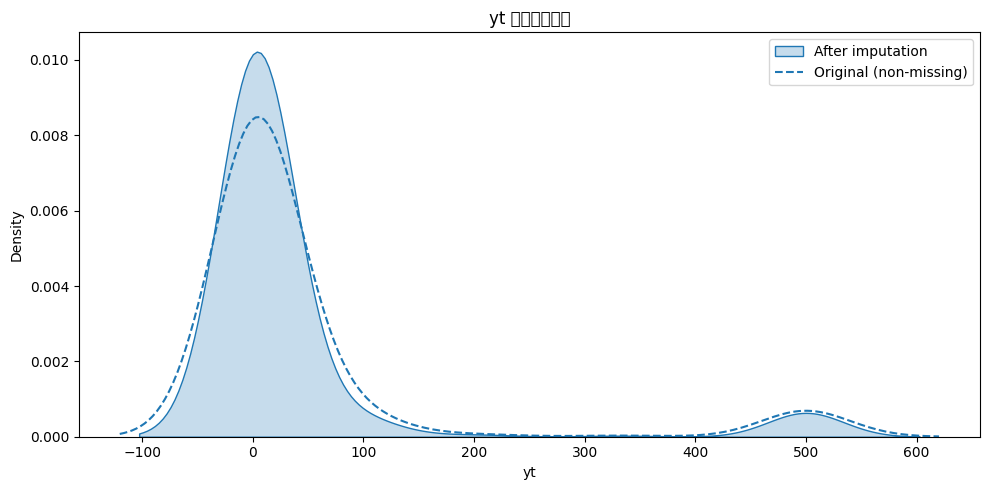

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

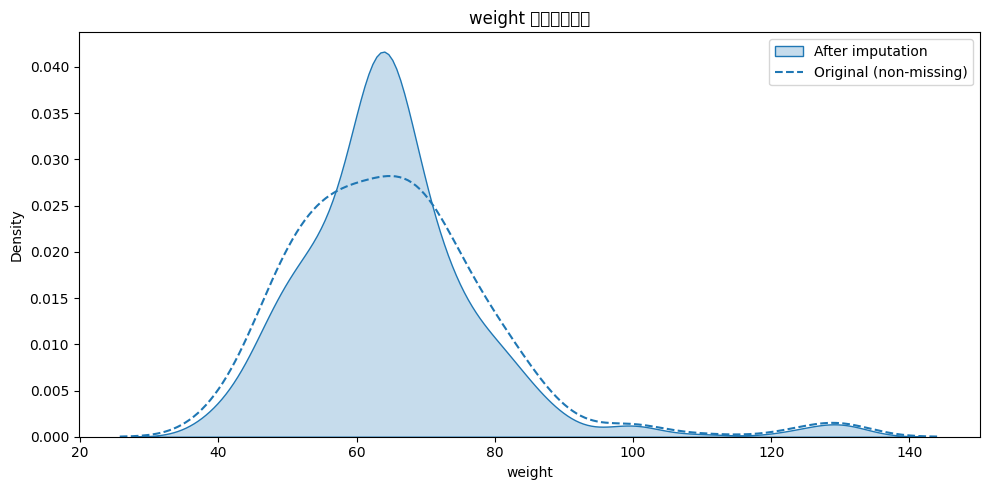

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1619-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

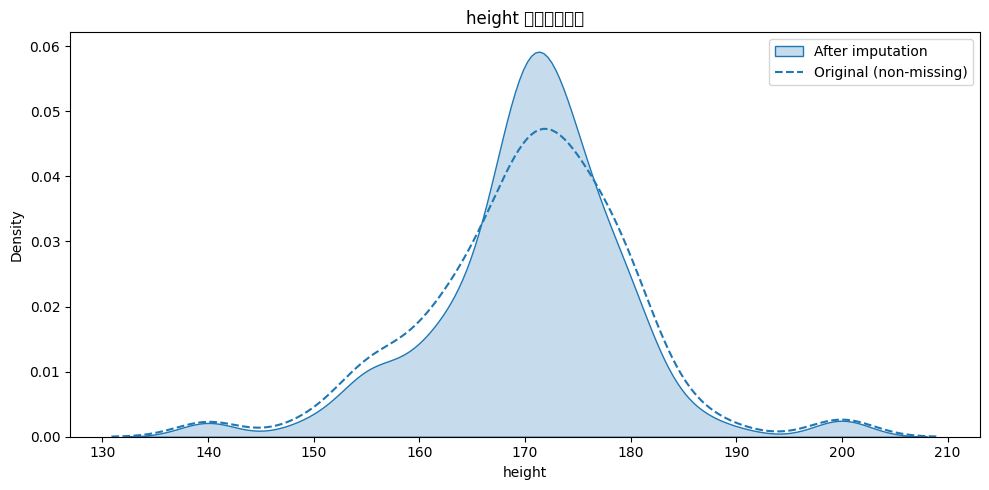

In [1630]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = svm_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 KNN(擇一)

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

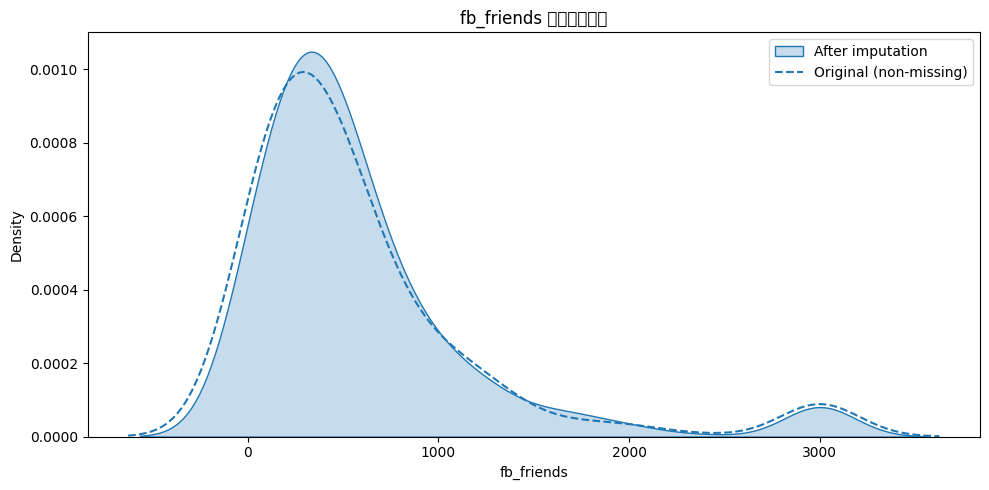

正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

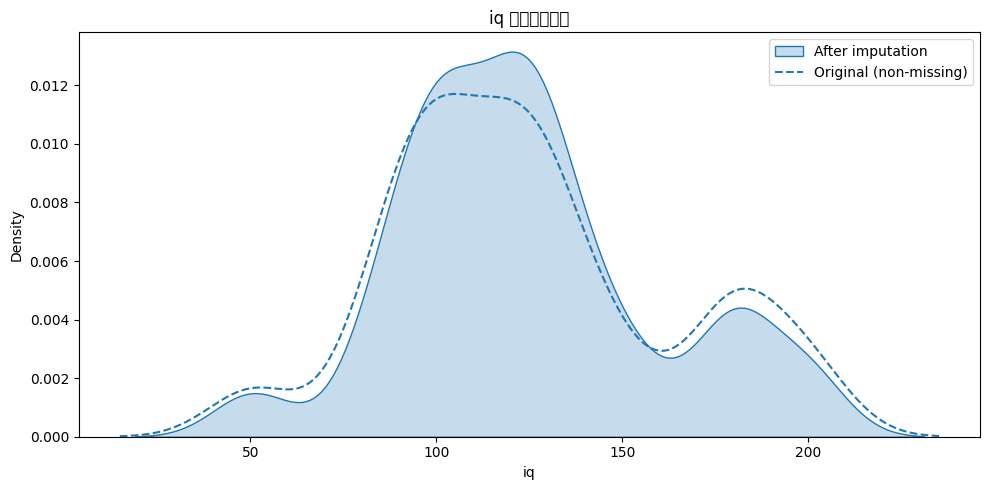

正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

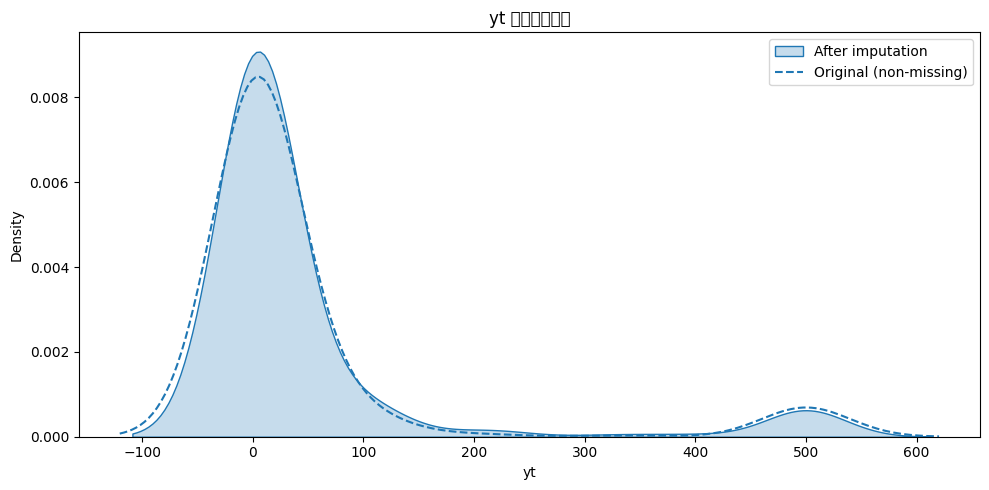

正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

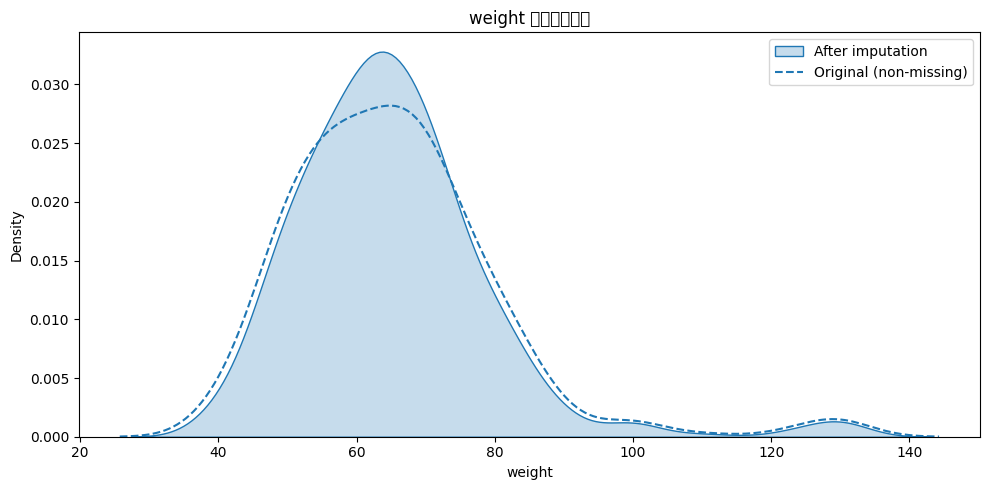

正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2432-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

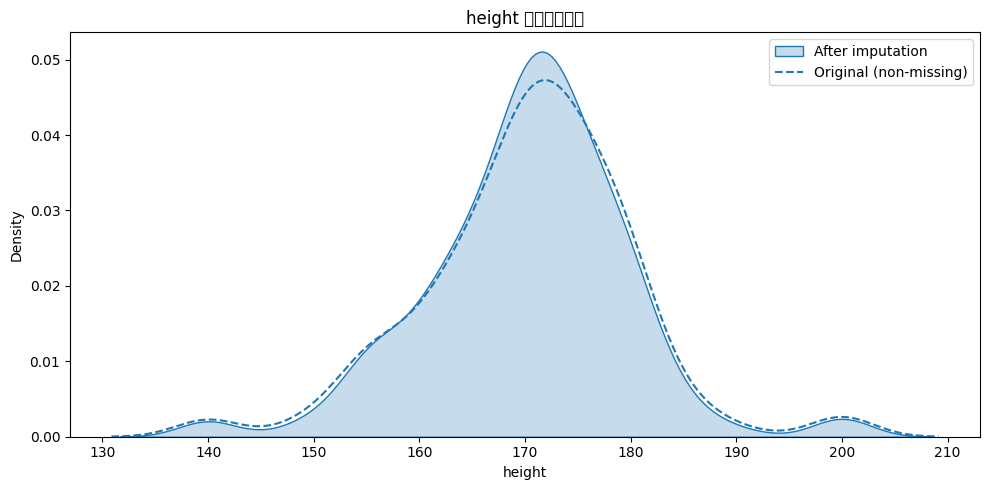

In [2444]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    print(f'正在處理: {target}')

    train_df, test_df = knn_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 分欄MICE(擇一)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIE

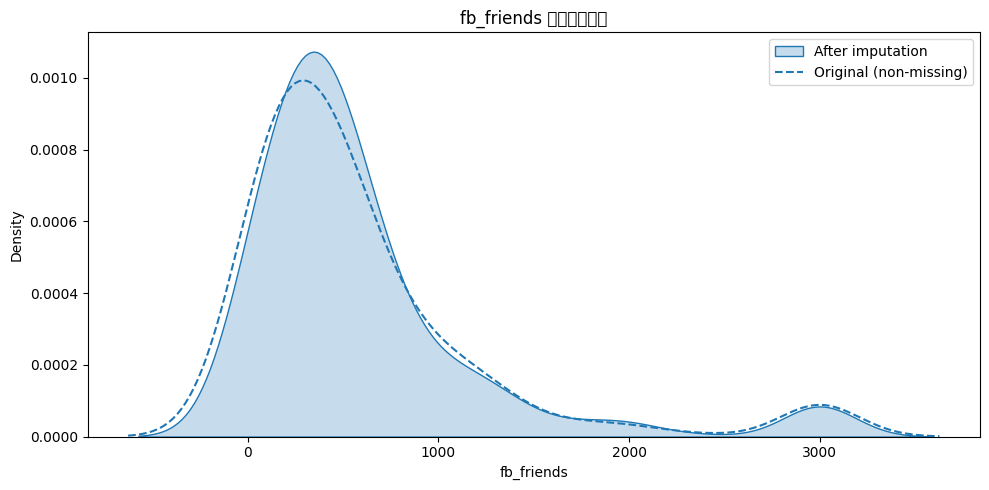

<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

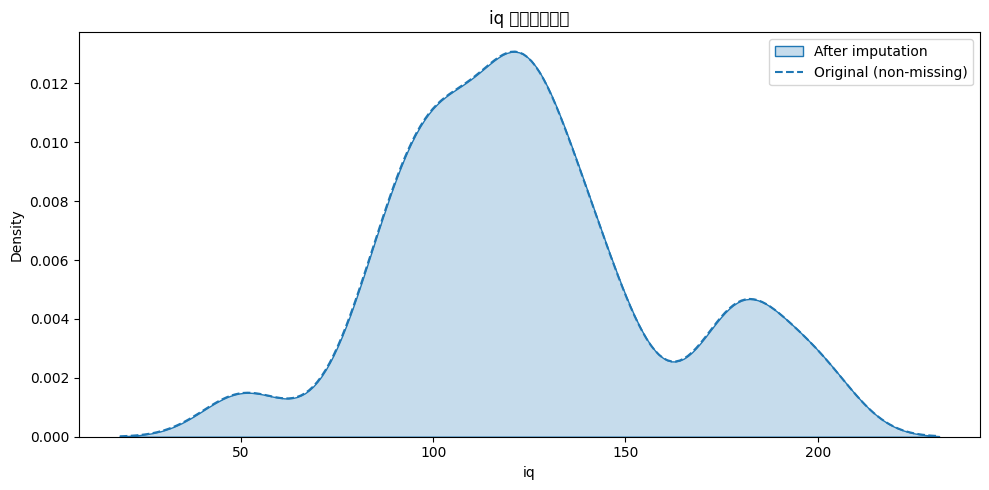

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIE

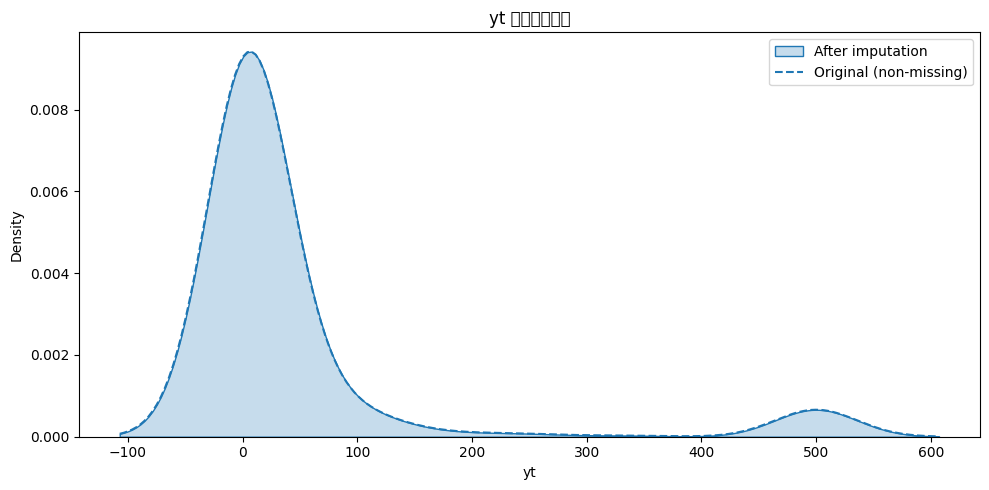

<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

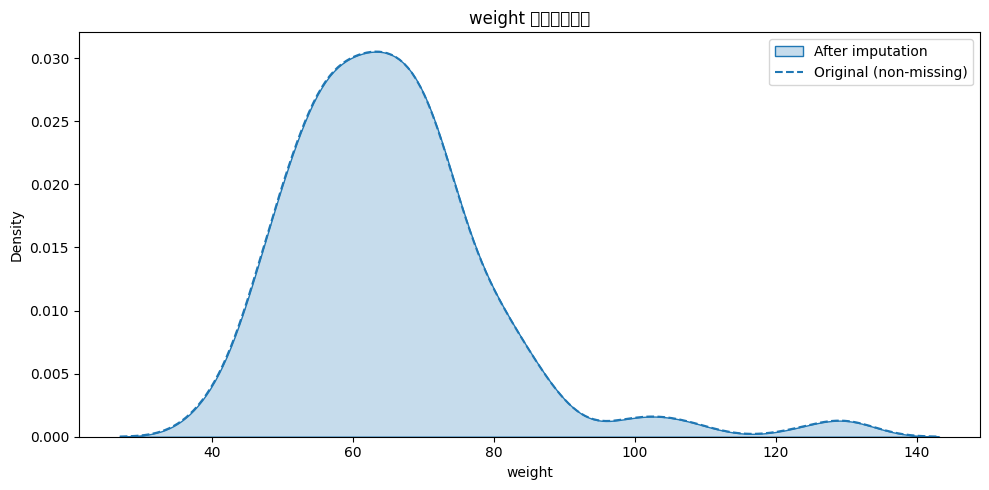

<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2493-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

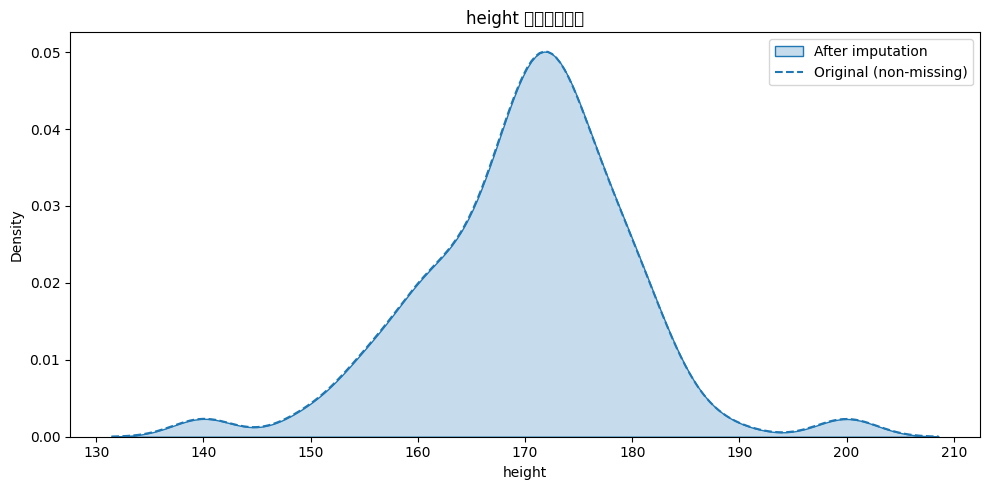

In [2505]:
for target, predictors in num_predictor_dict.items():
    train_df_before = train_df.copy()
    train_df, imputer_mice = impute_mice_train(
        train_df=train_df,
        target_col=target,
        predictor_cols=predictors
    )
    test_df = impute_mice_test(
        test_df=test_df,                 # train_df 不用傳了
        target_col=target,
        predictor_cols=predictors,
        imputer_mice=imputer_mice
    )
    plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.4 MICE(擇一)

<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 35036 (\N{CJK UNIFIED IDEOGRAPH-88DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2554-68d9b497df6f>:15: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 350

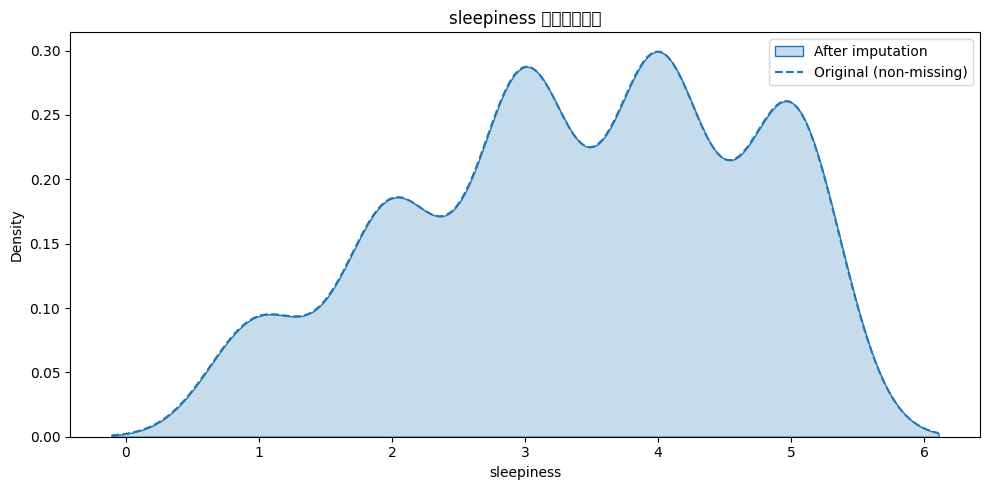

In [2566]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer
train_df_before = train_df.copy()
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state=42)

train_df[target_columns] = imputer.fit_transform(train_df[target_columns])
test_df[target_columns] = imputer.transform(test_df[target_columns])
plot_imputation_distribution(
        df_before=train_df_before,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

In [ ]:
test_df.isnull().sum()

,0
gender,426
phone_os,96
height,0
weight,0
sleepiness,72
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


In [ ]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,0
weight,0
sleepiness,91
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


# 3.4 MISSForest(擇一)

In [2769]:
pip install MissForest

In [2775]:
import pandas as pd
import numpy as np
from missforest import MissForest


categorical = [col for col in train_df.columns if col.startswith('is_outlier_')]
continuous = [col for col in train_df.columns if col not in categorical]

# 將類別型欄位轉為整數型（避免 float64 問題）
for col in categorical:
    train_df[col] = train_df[col].astype('Int64')  # 使用可空整數型
    test_df[col] = test_df[col].astype('Int64')

# 將連續型欄位統一為 float64
for col in continuous:
    train_df[col] = train_df[col].astype('float64')
    test_df[col] = test_df[col].astype('float64')

# 初始化 MissForest
mf = MissForest(max_iter=10, categorical=categorical)

# 訓練集填補
if train_df.isnull().sum().sum() > 0:
    train_imputed = mf.fit_transform(train_df)
    train_df = pd.DataFrame(train_imputed, columns=train_df.columns)
    print("訓練集填補完成")
else:
    print("訓練集無缺失值")

# 測試集填補
if test_df.isnull().sum().sum() > 0:
    test_imputed = mf.transform(test_df)
    test_df = pd.DataFrame(test_imputed, columns=test_df.columns)
    print("測試集填補完成")
else:
    print("測試集無缺失值")

# 確保類別型欄位保持整數型
for col in categorical:
    train_df[col] = train_df[col].round().astype('Int64')
    test_df[col] = test_df[col].round().astype('Int64')

# 檢查結果
print("\n最終訓練集缺失值數量:", train_df.isnull().sum().sum())
print("最終測試集缺失值數量:", test_df.isnull().sum().sum())

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 10/10 [00:13<00:00,  1.39s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting proces

訓練集填補完成


100%|██████████| 10/10 [00:00<00:00, 27.40it/s]

測試集填補完成

最終訓練集缺失值數量: 0
最終測試集缺失值數量: 0


# 3.4 RF-RFE(擇一)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# 定義 RF-RFE 特徵選擇函數
def rf_rfe_feature_selection(X_obs, y_obs, n_features_to_select=None):
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    selector = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)
    selector = selector.fit(X_obs, y_obs)
    return selector.support_

# 主函數 - RF-RFE 插補函數
def rf_rfe_imputation(X, gamma=1e-3, max_iter=10):
    X_imp = X.copy()
    missing_cols = X.isnull().sum().sort_values().index
    imp_mean = SimpleImputer(strategy='mean')
    X_imp.iloc[:, :] = imp_mean.fit_transform(X_imp)

    for iteration in range(max_iter):
        X_old = X_imp.copy()
        for col in missing_cols:
            obs_idx = X[col].notnull()
            mis_idx = X[col].isnull()
            if mis_idx.sum() == 0:
                continue
            X_obs = X_imp.loc[obs_idx].drop(columns=[col])
            y_obs = X_imp.loc[obs_idx, col]
            X_mis = X_imp.loc[mis_idx].drop(columns=[col])
            selected_features_mask = rf_rfe_feature_selection(X_obs, y_obs)
            X_obs_selected = X_obs.loc[:, selected_features_mask]
            X_mis_selected = X_mis.loc[:, selected_features_mask]
            rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
            rf_model.fit(X_obs_selected, y_obs)
            X_imp.loc[mis_idx, col] = rf_model.predict(X_mis_selected)
        diff = np.linalg.norm(X_imp - X_old) / np.linalg.norm(X_old)
        if diff < gamma:
            break
    return X_imp

# 先插補train再合併train和test插補test
def impute_train_then_combined(train_df, test_df, target_col, gamma=1e-4, max_iter=10):
    train_df_imputed = rf_rfe_imputation(train_df, gamma, max_iter)
    combined_df = pd.concat([train_df_imputed, test_df], keys=['train', 'test'])
    combined_df_imputed = rf_rfe_imputation(combined_df, gamma, max_iter)
    train_df_final = combined_df_imputed.loc['train']
    test_df_final = combined_df_imputed.loc['test']
    return train_df_final, test_df_final


In [ ]:
train_with_copy=train_df.copy()
train_df, test_df = impute_train_then_combined(train_df, test_df, target_col='gender', gamma=1e-4, max_iter=10)
plot_imputation_distribution(
        df_before=train_with_copy,
        df_after=train_df,
        target_col=target,
        title=f'{target} 補值前後分佈'
    )

# 3.5 查看分布

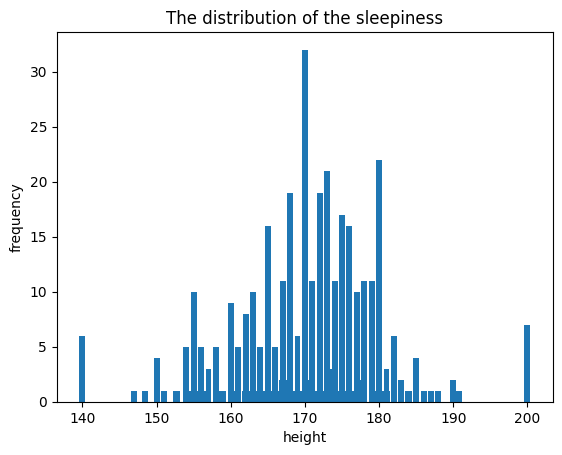

In [743]:
sleepiness_values = train_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

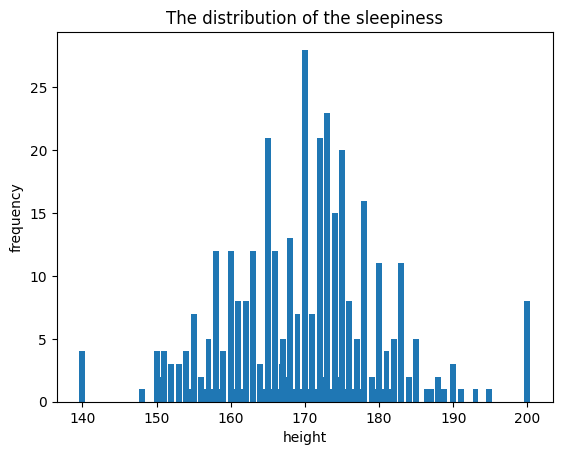

In [744]:
sleepiness_values = test_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = test_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<Axes: >

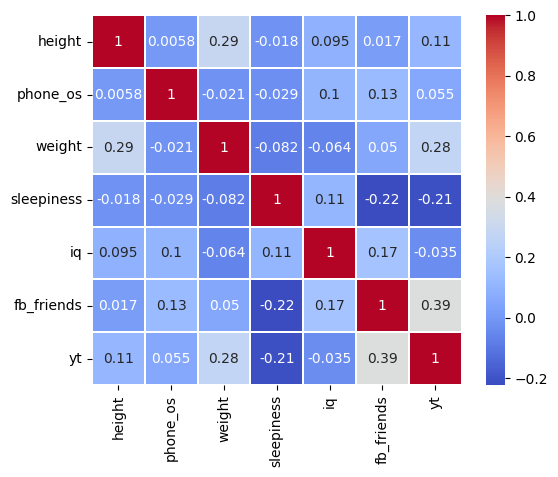

In [745]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

<Axes: >

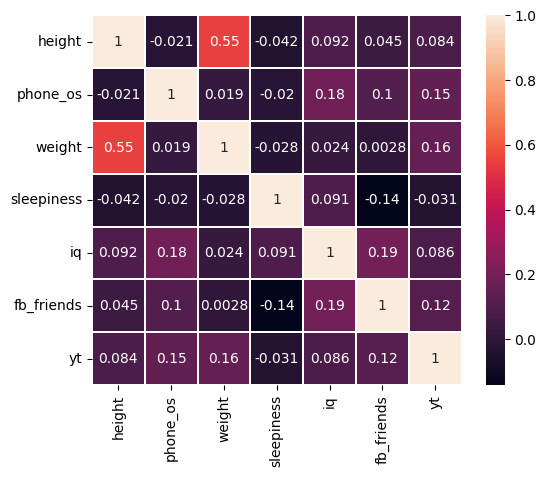

In [746]:
sns.heatmap(test_df[['height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

# **4. 編碼文字欄位(self_intro)**


In [747]:
train_df['gender'] = geder_train_backup
test_df['gender'] = geder_test_backup

<h2>4.1 TF-IDF

In [748]:
train_df['self_intro'] = self_train_backup.loc[train_df.index]
test_df['self_intro'] = self_test_backup.loc[test_df.index]

In [749]:
train_df

,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,gender,self_intro
0,1,154.0,43.0,4,122.379028,583.000000,0.000000,0,0,0,0,1,2,Beautiful
1,1,156.0,47.0,4,130.000000,320.377258,3.500000,1,0,0,0,0,2,Enjoying being who I'm notsss
2,0,170.0,61.0,2,90.000000,540.000000,5.774719,0,1,0,0,0,1,Practice Makes perfect
3,1,170.0,62.0,4,100.000000,323.843506,5.000000,1,0,0,0,0,1,Straightforward
4,0,158.0,67.0,4,128.000000,320.000000,1.200000,0,0,0,0,0,2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,166.0,66.0,4,90.000000,1000.000000,1.000000,0,0,0,0,0,1,I hope i am a super hero.
419,0,176.0,65.0,4,87.000000,1300.000000,2.000000,0,0,0,0,0,1,NaN
420,1,174.0,72.0,2,129.686493,2000.000000,9.000000,1,0,0,0,1,1,NaN
421,0,167.0,50.0,3,180.000000,483.000000,10.000000,0,0,0,0,0,2,NaN


In [750]:
test_df

,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,gender,self_intro
0,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,1,1,0,0,GOod
1,1,175.0,80.000000,3,133.497086,2000.000000,43.288635,1,1,0,0,1,0,Easygoing
2,1,155.0,45.000000,3,150.000000,895.700317,9.000000,1,0,0,0,0,0,NaN
3,1,173.0,85.000000,4,131.695511,1026.877075,15.000000,1,0,0,0,1,0,NaN
4,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,0,0,0,0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1,160.0,70.000000,4,130.401047,500.000000,5.000000,0,0,0,0,1,0,I am a girl.
422,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,0,0,0,0,NaN
423,1,173.0,66.000000,5,135.000000,102.000000,11.100000,0,0,0,0,0,0,I like to play basketball.
424,0,165.0,53.000000,2,110.000000,507.000000,416.000000,0,1,0,0,0,0,Good


In [751]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


In [752]:
train_df

,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,1,154.0,43.0,4,122.379028,583.000000,0.000000,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,156.0,47.0,4,130.000000,320.377258,3.500000,1,0,0,...,0.0,0.527714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,170.0,61.0,2,90.000000,540.000000,5.774719,0,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,170.0,62.0,4,100.000000,323.843506,5.000000,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,158.0,67.0,4,128.000000,320.000000,1.200000,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0,166.0,66.0,4,90.000000,1000.000000,1.000000,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,0,176.0,65.0,4,87.000000,1300.000000,2.000000,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,1,174.0,72.0,2,129.686493,2000.000000,9.000000,1,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0,167.0,50.0,3,180.000000,483.000000,10.000000,0,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [753]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [754]:
test_df

,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,175.0,80.000000,3,133.497086,2000.000000,43.288635,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,155.0,45.000000,3,150.000000,895.700317,9.000000,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,173.0,85.000000,4,131.695511,1026.877075,15.000000,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1,160.0,70.000000,4,130.401047,500.000000,5.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,1,173.0,66.000000,5,135.000000,102.000000,11.100000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0,165.0,53.000000,2,110.000000,507.000000,416.000000,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  **5. 特徵選取(新)**

## 5.1 特徵選擇

### 5.1.1 使用 RF 評估特徵

In [755]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_cols = ['gender', 'phone_os', 'height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']
train_df_fs = train_df[selected_cols]
test_df_fs = test_df[selected_cols]

print(f"資料集筆數: {train_df_fs.shape[0]}, 特徵數量: {train_df_fs.shape[1]-1}")

資料集筆數: 423, 特徵數量: 7


In [756]:
def remove_rows_with_extreme_values(X, threshold=1e10):
    X = X.copy()
    mask = (X > threshold) | (X < -threshold)
    rows_with_extreme = mask.any(axis=1)
    num_to_drop = rows_with_extreme.sum()
    print(f"將刪除 {num_to_drop} 筆含有極端值的資料列。")
    return X[~rows_with_extreme]

train_df_fs = remove_rows_with_extreme_values(train_df_fs)

將刪除 0 筆含有極端值的資料列。


In [757]:
# 將特徵與目標分開
X = train_df_fs.drop('gender', axis=1)   # 特徵矩陣
y = train_df_fs['gender']         # 目標變數

# 將資料集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"訓練資料筆數: {X_train.shape[0]}, 測試資料筆數: {X_test.shape[0]}")

訓練資料筆數: 317, 測試資料筆數: 106


In [758]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5):
    results = []

    # 訓練 baseline 模型並計算全特徵的重要性
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    feature_names = X_train.columns.tolist()
    feat_imp_pairs = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    print("所有特徵的重要性排序：")
    for name, imp in feat_imp_pairs:
        print(f"{name}: {imp:.4f}")

    # 針對最重要特徵分別訓練模型
    for n in range(1, max_features + 1):
        selected_features = [f for f, imp in feat_imp_pairs[:n]]
        X_train_sel = X_train[selected_features]
        X_test_sel = X_test[selected_features]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "num_features": n,
            "features": selected_features,
            "accuracy": acc
        })

    return results


In [759]:
results = evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5)

print("\n各特徵數的準確率比較：")
for r in results:
    print(f"{r['num_features']} 個特徵 → Accuracy: {r['accuracy']:.3f}, 特徵: {r['features']}")


所有特徵的重要性排序：
height: 0.3692
weight: 0.2353
yt: 0.1135
fb_friends: 0.1073
iq: 0.1034
sleepiness: 0.0455
phone_os: 0.0258

各特徵數的準確率比較：
1 個特徵 → Accuracy: 0.849, 特徵: ['height']
2 個特徵 → Accuracy: 0.830, 特徵: ['height', 'weight']
3 個特徵 → Accuracy: 0.849, 特徵: ['height', 'weight', 'yt']
4 個特徵 → Accuracy: 0.849, 特徵: ['height', 'weight', 'yt', 'fb_friends']
5 個特徵 → Accuracy: 0.887, 特徵: ['height', 'weight', 'yt', 'fb_friends', 'iq']


### 5.1.2 使用包裝法進行特徵選取

## 5.2 特徵萃取

### 5.2.1 數值型欄位萃取

In [760]:
pip install featuretools

In [761]:
import featuretools as ft
from xgboost import XGBClassifier

In [762]:
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [763]:
exclude_cols = ['phone_os','gender','sleepiness']

train_df_fs['id'] = id_train_backup
test_df_fs['id'] = id_test_backup

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df_fs, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df_fs, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness,iq_x,fb_friends_x,yt_x,id,height_y,...,fb_friends - height,fb_friends - iq,fb_friends - weight,fb_friends - yt,height - iq,height - weight,height - yt,iq - weight,iq - yt,weight - yt
0,2,1,154.0,43.0,4,122.379028,583.000000,0.000000,1,154.0,...,429.000000,460.620972,540.000000,583.000000,31.620972,111.0,154.000000,79.379028,122.379028,43.000000
1,2,1,156.0,47.0,4,130.000000,320.377258,3.500000,2,156.0,...,164.377258,190.377258,273.377258,316.877258,26.000000,109.0,152.500000,83.000000,126.500000,43.500000
2,1,0,170.0,61.0,2,90.000000,540.000000,5.774719,3,170.0,...,370.000000,450.000000,479.000000,534.225281,80.000000,109.0,164.225281,29.000000,84.225281,55.225281
3,1,1,170.0,62.0,4,100.000000,323.843506,5.000000,4,170.0,...,153.843506,223.843506,261.843506,318.843506,70.000000,108.0,165.000000,38.000000,95.000000,57.000000
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000,5,158.0,...,162.000000,192.000000,253.000000,318.800000,30.000000,91.0,156.800000,61.000000,126.800000,65.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000,419,166.0,...,834.000000,910.000000,934.000000,999.000000,76.000000,100.0,165.000000,24.000000,89.000000,65.000000
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000,420,176.0,...,1124.000000,1213.000000,1235.000000,1298.000000,89.000000,111.0,174.000000,22.000000,85.000000,63.000000
420,1,1,174.0,72.0,2,129.686493,2000.000000,9.000000,421,174.0,...,1826.000000,1870.313507,1928.000000,1991.000000,44.313507,102.0,165.000000,57.686493,120.686493,63.000000
421,2,0,167.0,50.0,3,180.000000,483.000000,10.000000,422,167.0,...,316.000000,303.000000,433.000000,473.000000,-13.000000,117.0,157.000000,130.000000,170.000000,40.000000


In [764]:
def clean_features(df, numeric_only=True):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(df.median(numeric_only=numeric_only))
    df = df.clip(lower=-1e6, upper=1e6)
    return df

# 訓練集
X_train = train_df_combined.drop(columns=['id','gender'])
X_train = clean_features(X_train)

# 測試集
X_test = test_df_combined.drop(columns=['id','gender'])  # 假設測試集也有 'id' 和 'gender'
X_test = clean_features(X_test)
y = train_df_fs['gender'].map({1: 0, 2: 1})
# 建立並訓練模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y)

# 特徵重要性
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:11:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
height + weight        0.245811
fb_friends_x           0.064455
yt_x                   0.042227
height - yt            0.039590
fb_friends * height    0.032701
iq - weight            0.032477
height + iq            0.030602
yt / height            0.027580
height_x               0.026023
fb_friends + weight    0.024873
dtype: float32


In [765]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = pd.concat([train_df_combined['id'], X_train[top_10_features]], axis=1)
test_top_features = pd.concat([test_df_combined['id'], X_test[top_10_features]], axis=1)

In [766]:
train_df['id'] = id_train_backup
test_df['id'] = id_test_backup

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')

train_df_fs = pd.merge(train_df_fs, train_top_features, on='id', how='left')
test_df_fs = pd.merge(test_df_fs, test_top_features, on='id', how='left')

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

In [767]:
train_df_fs

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,id,height + weight,fb_friends_x,yt_x,height - yt,fb_friends * height,iq - weight,height + iq,yt / height,height_x,fb_friends + weight
0,2,1,154.0,43.0,4,122.379028,583.000000,0.000000,1,197.0,583.000000,0.000000,154.000000,89782.000000,79.379028,276.379028,0.000000,154.0,626.000000
1,2,1,156.0,47.0,4,130.000000,320.377258,3.500000,2,203.0,320.377258,3.500000,152.500000,49978.852295,83.000000,286.000000,0.022436,156.0,367.377258
2,1,0,170.0,61.0,2,90.000000,540.000000,5.774719,3,231.0,540.000000,5.774719,164.225281,91800.000000,29.000000,260.000000,0.033969,170.0,601.000000
3,1,1,170.0,62.0,4,100.000000,323.843506,5.000000,4,232.0,323.843506,5.000000,165.000000,55053.395996,38.000000,270.000000,0.029412,170.0,385.843506
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000,5,225.0,320.000000,1.200000,156.800000,50560.000000,61.000000,286.000000,0.007595,158.0,387.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000,419,232.0,1000.000000,1.000000,165.000000,166000.000000,24.000000,256.000000,0.006024,166.0,1066.000000
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000,420,241.0,1300.000000,2.000000,174.000000,228800.000000,22.000000,263.000000,0.011364,176.0,1365.000000
420,1,1,174.0,72.0,2,129.686493,2000.000000,9.000000,421,246.0,2000.000000,9.000000,165.000000,348000.000000,57.686493,303.686493,0.051724,174.0,2072.000000
421,2,0,167.0,50.0,3,180.000000,483.000000,10.000000,422,217.0,483.000000,10.000000,157.000000,80661.000000,130.000000,347.000000,0.059880,167.0,533.000000


### 5.2.2 類別型欄位萃取

## 5.3 K-Mean 分群

In [768]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_kmeans_with_pca(df, target_col='gender', n_clusters=2):
    """
    對指定資料集進行 K-Means 分群與 PCA 視覺化。
    - 不會修改原始 df。
    - 傳入的 df 應包含 target_col（如 'gender'）。

    參數：
    - df: 原始資料集（Pandas DataFrame）
    - target_col: 目標變數欄位名稱（如 'gender'）
    - n_clusters: 要分幾群（預設 2）
    """

    # 1. 複製資料集，避免改到原始 df
    df_copy = df.copy()

    # 2. 分離特徵與目標欄位
    X = df_copy.drop(columns=[target_col])
    y = df_copy[target_col]

    # 3. 標準化特徵
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. 建立 KMeans 模型並進行分群
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 5. 降維：用 PCA 將資料壓到 2 維
    X_pca = PCA(n_components=2).fit_transform(X_scaled)

    # 6. 畫圖：KMeans 分群結果
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=50)
    plt.title(f"K-Means 分群結果（K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    # 7. 畫圖：真實性別結果
    plt.subplot(1, 2, 2)
    gender_numeric = y.astype('category').cat.codes
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gender_numeric, cmap='coolwarm', s=50)
    plt.title("實際性別分布")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    plt.tight_layout()
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    # 8. 回傳分群結果與 PCA 結果（如要進一步分析）
    return clusters, X_pca, result_df


<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-768-7f04bd8348a9>:54: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) miss

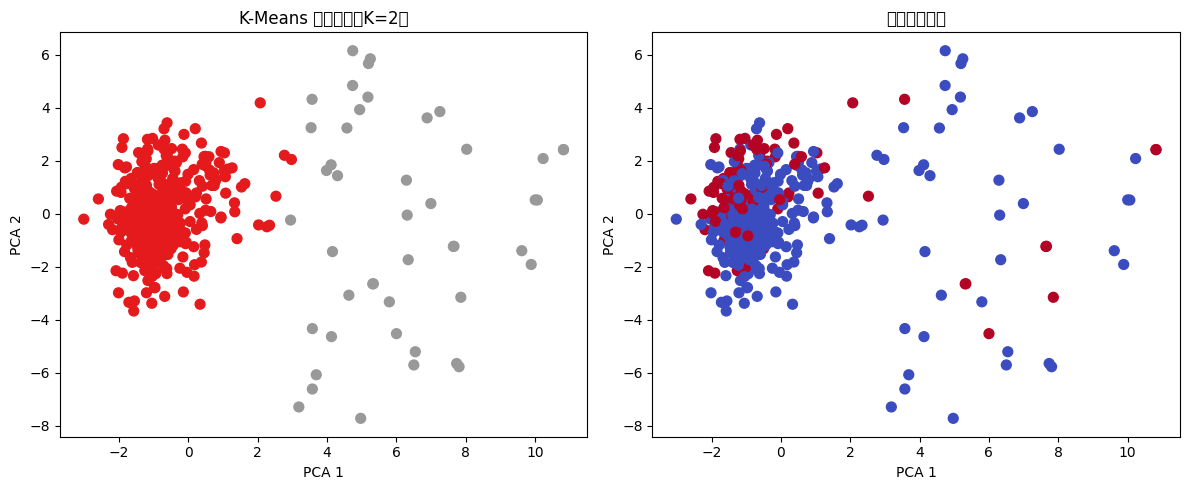

In [769]:
clusters, pca_result, result_df = visualize_kmeans_with_pca(train_df_fs)

In [770]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris

X = train_df_fs.drop(columns=['gender'])
y = train_df_fs['gender']

# LDA降維到2個線性判別組
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

print("降維後的數據形狀:", X_lda.shape)
print(result_df['cluster'].value_counts())

降維後的數據形狀: (423, 1)
cluster
0    377
1     46
Name: count, dtype: int64


In [771]:
test_df_fs

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,id,height + weight,fb_friends_x,yt_x,height - yt,fb_friends * height,iq - weight,height + iq,yt / height,height_x,fb_friends + weight
0,0,1,200.0,100.000000,1,87.000000,87.000000,87.000000,1,300.000000,87.000000,87.000000,113.000000,17400.000000,-13.000000,287.000000,0.435000,200.0,187.000000
1,0,1,175.0,80.000000,3,133.497086,2000.000000,43.288635,2,255.000000,2000.000000,43.288635,131.711365,350000.000000,53.497086,308.497086,0.247364,175.0,2080.000000
2,0,1,155.0,45.000000,3,150.000000,895.700317,9.000000,3,200.000000,895.700317,9.000000,146.000000,138833.549194,105.000000,305.000000,0.058065,155.0,940.700317
3,0,1,173.0,85.000000,4,131.695511,1026.877075,15.000000,4,258.000000,1026.877075,15.000000,158.000000,177649.734009,46.695511,304.695511,0.086705,173.0,1111.877075
4,0,0,164.0,57.000000,4,130.000000,505.000000,2.000000,5,221.000000,505.000000,2.000000,162.000000,82820.000000,73.000000,294.000000,0.012195,164.0,562.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.000000,4,130.401047,500.000000,5.000000,422,230.000000,500.000000,5.000000,155.000000,80000.000000,60.401047,290.401047,0.031250,160.0,570.000000
422,0,0,162.0,54.000000,3,180.000000,462.000000,5.000000,423,216.000000,462.000000,5.000000,157.000000,74844.000000,126.000000,342.000000,0.030864,162.0,516.000000
423,0,1,173.0,66.000000,5,135.000000,102.000000,11.100000,424,239.000000,102.000000,11.100000,161.900000,17646.000000,69.000000,308.000000,0.064162,173.0,168.000000
424,0,0,165.0,53.000000,2,110.000000,507.000000,416.000000,425,218.000000,507.000000,416.000000,-251.000000,83655.000000,57.000000,275.000000,2.521212,165.0,560.000000


In [772]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def kmeans_all_features_plot(df, n_clusters=2):
    """
    對傳入資料集的所有數值特徵欄位進行 KMeans 分群並用 PCA 視覺化。
    """
    df = df.drop(columns=['gender'])
    # 1. 只取數值欄位（避免有非數值特徵造成錯誤）
    X = df.select_dtypes(include=['float64', 'int64']).dropna()

    # 2. 標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. 執行 KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 4. PCA 降維（轉換成 2 維供視覺化）
    X_pca = PCA(n_components=2).fit_transform(X_scaled)


    # 5. 畫圖
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=60)
    plt.title(f"K-Means 分群結果（使用所有特徵, K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    return clusters, result_df


In [773]:
test_df_fs

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,id,height + weight,fb_friends_x,yt_x,height - yt,fb_friends * height,iq - weight,height + iq,yt / height,height_x,fb_friends + weight
0,0,1,200.0,100.000000,1,87.000000,87.000000,87.000000,1,300.000000,87.000000,87.000000,113.000000,17400.000000,-13.000000,287.000000,0.435000,200.0,187.000000
1,0,1,175.0,80.000000,3,133.497086,2000.000000,43.288635,2,255.000000,2000.000000,43.288635,131.711365,350000.000000,53.497086,308.497086,0.247364,175.0,2080.000000
2,0,1,155.0,45.000000,3,150.000000,895.700317,9.000000,3,200.000000,895.700317,9.000000,146.000000,138833.549194,105.000000,305.000000,0.058065,155.0,940.700317
3,0,1,173.0,85.000000,4,131.695511,1026.877075,15.000000,4,258.000000,1026.877075,15.000000,158.000000,177649.734009,46.695511,304.695511,0.086705,173.0,1111.877075
4,0,0,164.0,57.000000,4,130.000000,505.000000,2.000000,5,221.000000,505.000000,2.000000,162.000000,82820.000000,73.000000,294.000000,0.012195,164.0,562.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,1,160.0,70.000000,4,130.401047,500.000000,5.000000,422,230.000000,500.000000,5.000000,155.000000,80000.000000,60.401047,290.401047,0.031250,160.0,570.000000
422,0,0,162.0,54.000000,3,180.000000,462.000000,5.000000,423,216.000000,462.000000,5.000000,157.000000,74844.000000,126.000000,342.000000,0.030864,162.0,516.000000
423,0,1,173.0,66.000000,5,135.000000,102.000000,11.100000,424,239.000000,102.000000,11.100000,161.900000,17646.000000,69.000000,308.000000,0.064162,173.0,168.000000
424,0,0,165.0,53.000000,2,110.000000,507.000000,416.000000,425,218.000000,507.000000,416.000000,-251.000000,83655.000000,57.000000,275.000000,2.521212,165.0,560.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

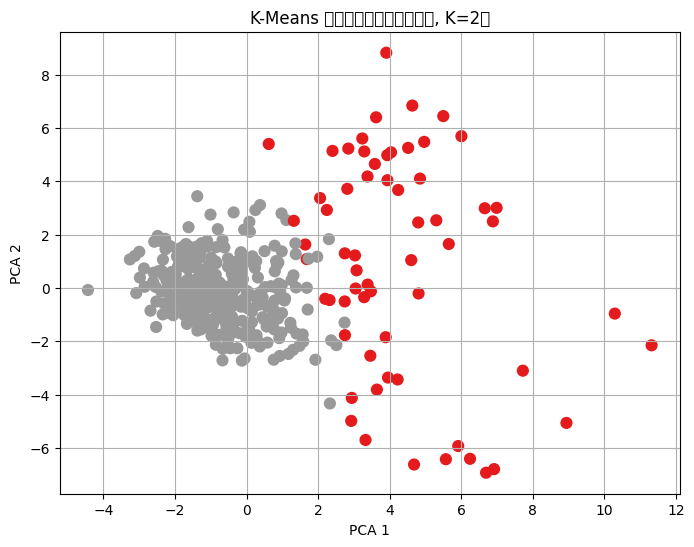

cluster
1    364
0     62
Name: count, dtype: int64


In [774]:
clusters, result_df = kmeans_all_features_plot(test_df_fs, n_clusters=2)
print(result_df['cluster'].value_counts())

In [775]:
train_df.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)
test_df.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)

train_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)
test_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)

In [776]:
test_df

,height,weight,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,gender,123,always,...,height + weight,fb_friends_x,yt_x,height - yt,fb_friends * height,iq - weight,height + iq,yt / height,height_x,fb_friends + weight
0,200.0,100.000000,0,1,1,1,0,0,0.0,0.0,...,300.000000,87.000000,87.000000,113.000000,17400.000000,-13.000000,287.000000,0.435000,200.0,187.000000
1,175.0,80.000000,1,1,0,0,1,0,0.0,0.0,...,255.000000,2000.000000,43.288635,131.711365,350000.000000,53.497086,308.497086,0.247364,175.0,2080.000000
2,155.0,45.000000,1,0,0,0,0,0,0.0,0.0,...,200.000000,895.700317,9.000000,146.000000,138833.549194,105.000000,305.000000,0.058065,155.0,940.700317
3,173.0,85.000000,1,0,0,0,1,0,0.0,0.0,...,258.000000,1026.877075,15.000000,158.000000,177649.734009,46.695511,304.695511,0.086705,173.0,1111.877075
4,164.0,57.000000,0,0,0,0,0,0,0.0,0.0,...,221.000000,505.000000,2.000000,162.000000,82820.000000,73.000000,294.000000,0.012195,164.0,562.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,160.0,70.000000,0,0,0,0,1,0,0.0,0.0,...,230.000000,500.000000,5.000000,155.000000,80000.000000,60.401047,290.401047,0.031250,160.0,570.000000
422,162.0,54.000000,0,0,0,0,0,0,0.0,0.0,...,216.000000,462.000000,5.000000,157.000000,74844.000000,126.000000,342.000000,0.030864,162.0,516.000000
423,173.0,66.000000,0,0,0,0,0,0,0.0,0.0,...,239.000000,102.000000,11.100000,161.900000,17646.000000,69.000000,308.000000,0.064162,173.0,168.000000
424,165.0,53.000000,0,1,0,0,0,0,0.0,0.0,...,218.000000,507.000000,416.000000,-251.000000,83655.000000,57.000000,275.000000,2.521212,165.0,560.000000


#  **5. 特徵選取(舊)**

In [ ]:
pip install featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 17.3 MB/s eta 0:00:00


In [ ]:
import featuretools as ft
from xgboost import XGBClassifier

train_df['id'] = id_train_backup
test_df['id'] = id_test_backup
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
              'absolute',
              'negate'
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [ ]:
exclude_cols = ['gender', 'phone_os']

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness_x,iq_x,fb_friends_x,yt_x,is_outlier_fb_friends_x,is_outlier_yt_x,...,world - xd,world - you,world - yt,world - zzzz,xd - you,xd - yt,xd - zzzz,you - yt,you - zzzz,yt - zzzz
0,2,1,154.0,43.0,5,139.4,583.0,0.000,0,0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,0.000
1,2,1,156.0,47.0,5,130.0,400.0,3.500,1,0,...,0.0,0.0,-3.500,0.0,0.0,-3.500,0.0,-3.500,0.0,3.500
2,1,0,170.0,61.0,3,90.0,540.0,2.455,0,1,...,0.0,0.0,-2.455,0.0,0.0,-2.455,0.0,-2.455,0.0,2.455
3,1,1,170.0,62.0,4,100.0,400.0,5.000,1,0,...,0.0,0.0,-5.000,0.0,0.0,-5.000,0.0,-5.000,0.0,5.000
4,2,0,158.0,67.0,4,128.0,320.0,1.200,0,0,...,0.0,0.0,-1.200,0.0,0.0,-1.200,0.0,-1.200,0.0,1.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.0,1000.0,1.000,0,0,...,0.0,0.0,-1.000,0.0,0.0,-1.000,0.0,-1.000,0.0,1.000
419,1,0,176.0,65.0,4,87.0,1300.0,2.000,0,0,...,0.0,0.0,-2.000,0.0,0.0,-2.000,0.0,-2.000,0.0,2.000
420,1,1,174.0,72.0,2,140.8,2000.0,9.000,1,0,...,0.0,0.0,-9.000,0.0,0.0,-9.000,0.0,-9.000,0.0,9.000
421,2,1,167.0,50.0,3,180.0,483.0,10.000,0,0,...,0.0,0.0,-10.000,0.0,0.0,-10.000,0.0,-10.000,0.0,10.000


In [ ]:
# 目標欄位
target_col = 'gender'

# 特徵與標籤
X = train_df_combined.drop(columns=['id', 'gender'])
y = train_df_combined['gender'].map({1: 0, 2: 1})  # 不動原始欄位

# ✅ 清理 inf / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
X = X.clip(lower=-1e6, upper=1e6)  # 可選：限制極端值

# 建立模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)


# 特徵重要性對應每個欄位
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# 排序（由高到低）
feature_importances = feature_importances.sort_values(ascending=False)

# 顯示前 20 名最重要的特徵
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
and - height                      0.485230
height + sleepiness               0.090048
height + weight                   0.056179
simple - yt                       0.024948
height - is_outlier_yt            0.021519
height - weight                   0.017766
height - is_outlier_fb_friends    0.016503
is_outlier_height - weight        0.013176
and + kindness                    0.009095
height_x                          0.008012
dtype: float32


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

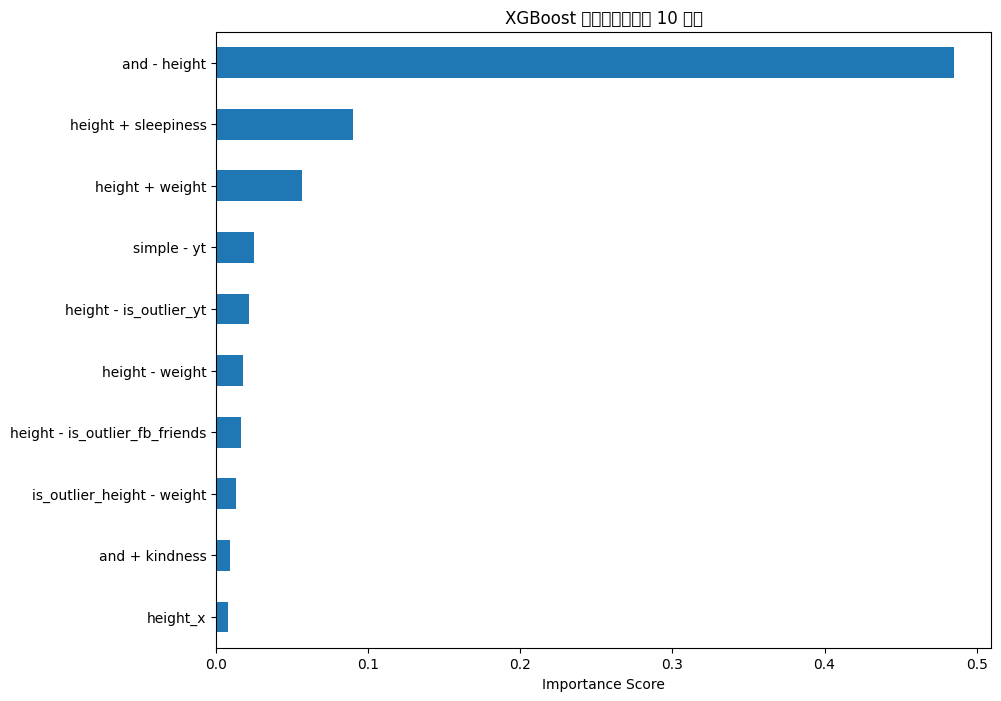

In [ ]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost 特徵重要性（前 10 名）")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [ ]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = train_df_combined[['id'] + top_10_features]
test_top_features = test_df_combined[['id'] + top_10_features]

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# **6.資料不平衡處理**


In [777]:
print(train_df['gender'].value_counts(normalize=True))

gender
1    0.747045
2    0.252955
Name: proportion, dtype: float64


In [778]:
pip install imbalanced-learn

# 6.1 SMOTE

In [779]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 定義 SMOTE 處理函數
def apply_smote(X, y, random_state=42):
    # 處理無窮大和 NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median(numeric_only=True))
    # 標籤轉為 0 和 1
    y_encoded = y - 1 # gender: 1/2 → 0/1
    # SMOTE 重抽樣
    smote = SMOTE(random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    print("SMOTE 後分佈：", Counter(y_smote))
    return X_smote, y_smote


# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']
X_smote, y_smote = apply_smote(X, y, random_state=42)

SMOTE 後分佈： Counter({1: 316, 0: 316})


# 6.1SMOTENN

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']

# 初始化 SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# 重取樣
X_smote, y_smote = smote_enn.fit_resample(X, y)

# 查看前後類別分佈
print("原始分佈：", Counter(y))
print("SMOTEENN 後：", Counter(y_resampled))

# **7. 預測分類模型**


In [780]:
# 定義數據清理函數
def clean_data(X, reference_df=None):
    """
    清理數據中的無窮大和 NaN 值。

    參數:
    - X: 要清理的數據
    - reference_df: 用於填充 NaN 的參考數據（可選）
    """
    X_clean = X.copy()
    for col in X_clean.columns:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')  # 轉為數值，無效值變 NaN
        # 如果有參考數據，使用其中位數填充；否則用自身中位數
        fill_value = reference_df[col].median() if reference_df is not None else X_clean[col].median()
        X_clean[col] = X_clean[col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)
        X_clean[col] = X_clean[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍
    return X_clean

<h2> 7.1 XGBOOST

(討論)ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [781]:
from xgboost import XGBClassifier
#  建立模型
xg_clf = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
#    scale_pos_weight=2.04,  # 調整少數類權重
    eval_metric='logloss',
    random_state=42
)


In [782]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
height                   0
weight                   0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
                        ..
iq - weight              0
height + iq              0
yt / height              0
height_x                 0
fb_friends + weight      0
Length: 118, dtype: int64

Test 欄位缺失情況：
height                   0
weight                   0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
                        ..
iq - weight              0
height + iq              0
yt / height              0
height_x                 0
fb_friends + weight      0
Length: 118, dtype: int64


<h2>7.2 Random forest

In [783]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
#    class_weight='balanced',
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)


# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = rf_clf.predict(X_test)+1

In [784]:
test_df['gender'] = y_test_pred

In [785]:
test_df

,height,weight,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,gender,123,always,...,height + weight,fb_friends_x,yt_x,height - yt,fb_friends * height,iq - weight,height + iq,yt / height,height_x,fb_friends + weight
0,200.0,100.000000,0,1,1,1,0,1,0.0,0.0,...,300.000000,87.000000,87.000000,113.000000,17400.000000,-13.000000,287.000000,0.435000,200.0,187.000000
1,175.0,80.000000,1,1,0,0,1,1,0.0,0.0,...,255.000000,2000.000000,43.288635,131.711365,350000.000000,53.497086,308.497086,0.247364,175.0,2080.000000
2,155.0,45.000000,1,0,0,0,0,2,0.0,0.0,...,200.000000,895.700317,9.000000,146.000000,138833.549194,105.000000,305.000000,0.058065,155.0,940.700317
3,173.0,85.000000,1,0,0,0,1,1,0.0,0.0,...,258.000000,1026.877075,15.000000,158.000000,177649.734009,46.695511,304.695511,0.086705,173.0,1111.877075
4,164.0,57.000000,0,0,0,0,0,2,0.0,0.0,...,221.000000,505.000000,2.000000,162.000000,82820.000000,73.000000,294.000000,0.012195,164.0,562.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,160.0,70.000000,0,0,0,0,1,2,0.0,0.0,...,230.000000,500.000000,5.000000,155.000000,80000.000000,60.401047,290.401047,0.031250,160.0,570.000000
422,162.0,54.000000,0,0,0,0,0,2,0.0,0.0,...,216.000000,462.000000,5.000000,157.000000,74844.000000,126.000000,342.000000,0.030864,162.0,516.000000
423,173.0,66.000000,0,0,0,0,0,1,0.0,0.0,...,239.000000,102.000000,11.100000,161.900000,17646.000000,69.000000,308.000000,0.064162,173.0,168.000000
424,165.0,53.000000,0,1,0,0,0,2,0.0,0.0,...,218.000000,507.000000,416.000000,-251.000000,83655.000000,57.000000,275.000000,2.521212,165.0,560.000000


In [786]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1,284
2,142


<h2> 7.3 Light GBM

In [787]:
from lightgbm import LGBMClassifier
import warnings
lgb_base = LGBMClassifier(
    n_estimators=100,      # 比 RF 少一點，避免過擬合
    max_depth=7,           # 稍淺，控制模型複雜度
    min_child_samples=5,   # 類似 min_samples_leaf，增強泛化
    learning_rate=0.1,     # 適中的學習率
    num_leaves=20,         # 控制每棵樹的葉子數，小數據集不宜過多
    random_state=42,
    n_jobs=-1
)
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=UserWarning)  # 忽略特定警告
  lgb_base.fit(X_smote, y_smote)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 316, number of negative: 316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2881
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

<h2> 7.4 Stack

In [788]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', rf_clf),
    ('xgb', xg_clf)
]
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
# 模型訓練
stack_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = stack_clf.predict(X_test) + 1

In [789]:
test_df['gender'] = y_test_pred
test_df

,height,weight,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,gender,123,always,...,height + weight,fb_friends_x,yt_x,height - yt,fb_friends * height,iq - weight,height + iq,yt / height,height_x,fb_friends + weight
0,200.0,100.000000,0,1,1,1,0,1,0.0,0.0,...,300.000000,87.000000,87.000000,113.000000,17400.000000,-13.000000,287.000000,0.435000,200.0,187.000000
1,175.0,80.000000,1,1,0,0,1,1,0.0,0.0,...,255.000000,2000.000000,43.288635,131.711365,350000.000000,53.497086,308.497086,0.247364,175.0,2080.000000
2,155.0,45.000000,1,0,0,0,0,2,0.0,0.0,...,200.000000,895.700317,9.000000,146.000000,138833.549194,105.000000,305.000000,0.058065,155.0,940.700317
3,173.0,85.000000,1,0,0,0,1,1,0.0,0.0,...,258.000000,1026.877075,15.000000,158.000000,177649.734009,46.695511,304.695511,0.086705,173.0,1111.877075
4,164.0,57.000000,0,0,0,0,0,2,0.0,0.0,...,221.000000,505.000000,2.000000,162.000000,82820.000000,73.000000,294.000000,0.012195,164.0,562.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,160.0,70.000000,0,0,0,0,1,2,0.0,0.0,...,230.000000,500.000000,5.000000,155.000000,80000.000000,60.401047,290.401047,0.031250,160.0,570.000000
422,162.0,54.000000,0,0,0,0,0,2,0.0,0.0,...,216.000000,462.000000,5.000000,157.000000,74844.000000,126.000000,342.000000,0.030864,162.0,516.000000
423,173.0,66.000000,0,0,0,0,0,1,0.0,0.0,...,239.000000,102.000000,11.100000,161.900000,17646.000000,69.000000,308.000000,0.064162,173.0,168.000000
424,165.0,53.000000,0,1,0,0,0,2,0.0,0.0,...,218.000000,507.000000,416.000000,-251.000000,83655.000000,57.000000,275.000000,2.521212,165.0,560.000000


In [790]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1,289
2,137


In [791]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_stacktextpreprocess.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！


<h2> 7.5 模型交叉驗證

In [792]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 定義交叉驗證函數
def run_cross_validation(X, y, model, use_smote=True, cv=5, random_state=42):
    """
    執行交叉驗證並返回多個評估指標。

    參數:
    - X: 特徵數據
    - y: 標籤數據 (假設為 1/2)
    - model: 要評估的模型
    - use_smote: 是否在交叉驗證中使用 SMOTE (True: 用 Pipeline; False: 直接用原始數據)
    - cv: 交叉驗證折數，預設為 5
    - random_state: 隨機種子

    返回:
    - metrics: 包含各指標的字典
    """
    # 清理數據
    X_clean = clean_data(X)
    # 調整標籤為 0/1
    y_adjusted = y - 1

    # 定義 StratifiedKFold
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

    # 根據 use_smote 選擇是否使用 Pipeline
    if use_smote:
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('classifier', model)
        ])
        estimator = pipeline
    else:
        estimator = model


    # 計算各評估指標
    metrics = {
        'accuracy': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='accuracy'),
        'precision': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='precision'),
        'recall': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='recall'),
        'f1': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='f1'),
        'roc_auc': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='roc_auc')
    }

    # 輸出結果
    print(f"\n{model}\n五折交叉驗證評估指標（use_smote={use_smote}）：")
    for metric, scores in metrics.items():
        print(f"{metric}: 平均 = {np.mean(scores):.4f}, 每折 = {scores}")

    return metrics


In [793]:
# 測試 1: 使用 Pipeline(有對訓練集做smote)
metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=True)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.8701, 每折 = [0.87058824 0.90588235 0.8        0.86904762 0.9047619 ]
precision: 平均 = 0.7231, 每折 = [0.7037037  0.79166667 0.58333333 0.72727273 0.80952381]
recall: 平均 = 0.7931, 每折 = [0.86363636 0.86363636 0.66666667 0.76190476 0.80952381]
f1: 平均 = 0.7555, 每折 = [0.7755102  0.82608696 0.62222222 0.74418605 0.80952381]
roc_auc: 平均 = 0.9200, 每折 = [0.93290043 0.97402597 0.84672619 0.90173847 0.94482237]


In [794]:
metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.8628, 每折 = [0.89411765 0.90588235 0.82352941 0.83333333 0.85714286]
precision: 平均 = 0.7199, 每折 = [0.7826087  0.81818182 0.63636364 0.66666667 0.69565217]
recall: 平均 = 0.7463, 每折 = [0.81818182 0.8181

In [795]:
metrics_smote = run_cross_validation(X, y, stack_clf, use_smote=True)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stoppi